# Pkg Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Setting up  Environments 

In [3]:
sns.set(style='darkgrid', context='talk', palette='rainbow', font_scale=1)


### loading Dataset ...

In [4]:
dataset_url='https://archive.ics.uci.edu/static/public/165/data.csv'

dataframe = pd.read_csv(dataset_url)

dataframe.columns = [str(col).strip() for col in dataframe.columns]

print(f'Dtaset Size {dataframe.shape}, Row count {dataframe.shape[0]} , feature count {dataframe.shape[1]}')

dataframe.head()

Dtaset Size (1030, 9), Row count 1030 , feature count 9


Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Concrete compressive strength  
0            1040.0           676.0   28                          79.99  
1            1055.0           676.0   28                          61.89  
2             932.0           594.0  270                          40.27  
3             932.0           594.0  365                          41.05  
4             978.4           825.5  360                          44.30

### Null Analysis

In [5]:
dataframe.isna().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

### Duplicate Analysis

In [6]:
dup_data = dataframe[dataframe.duplicated(keep='first')]
print(f'Duplicate Count {dup_data.shape[0]}')
if not dup_data.empty:
    dataframe.drop_duplicates(keep='first', inplace=True)
    dup_data = dataframe[dataframe.duplicated(keep='first')]
    print(f'Duplicate Count after Duplicate Remover {dup_data.shape[0]}')



Duplicate Count 25
Duplicate Count after Duplicate Remover 0


### Data visualization 


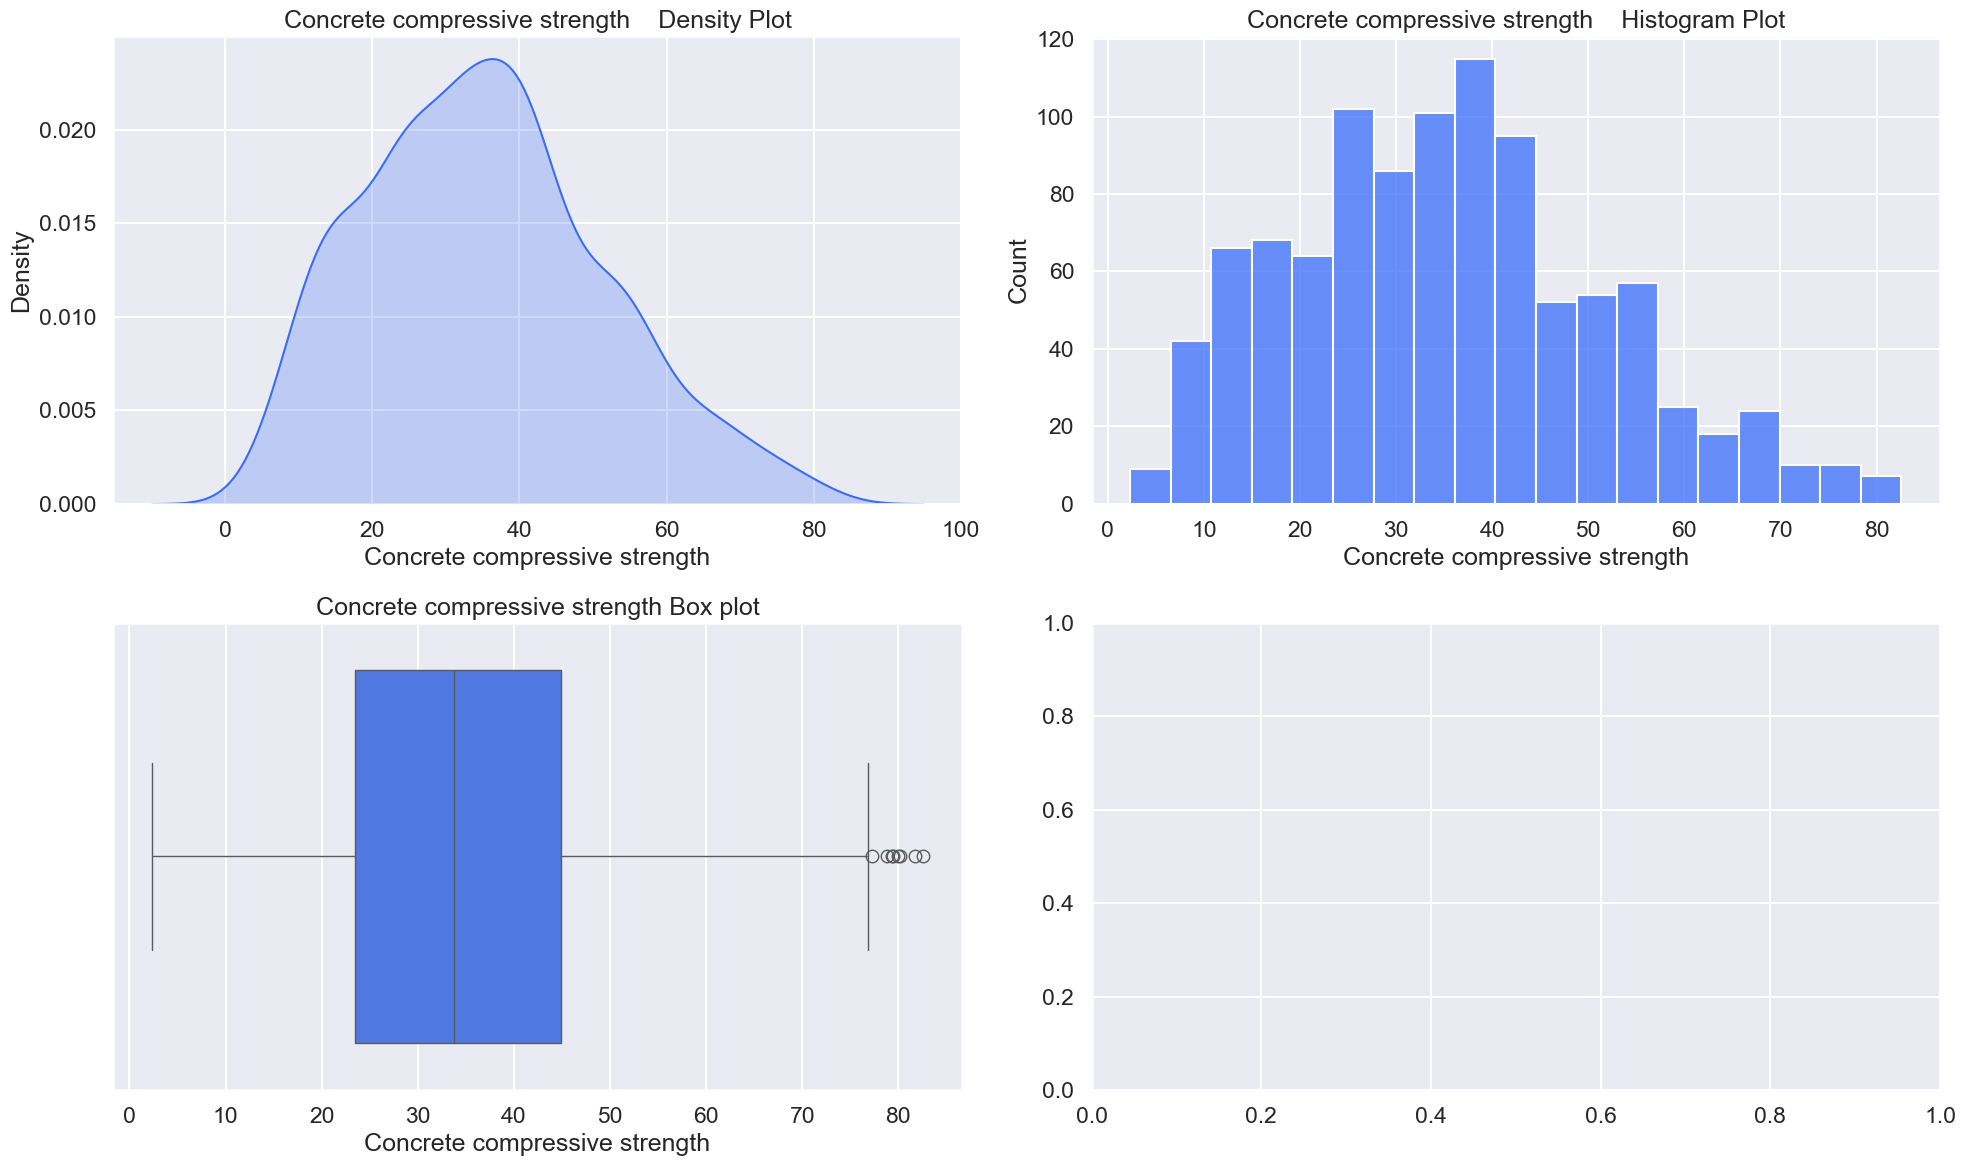

In [8]:
target_col = 'Concrete compressive strength'

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

sns.kdeplot(x=target_col, data=dataframe,fill=True, ax=axes[0][0])
axes[0][0].set_title(f"{target_col}    Density Plot")

sns.histplot(x=target_col, data=dataframe, ax=axes[0][1])
axes[0][1].set_title(f"{target_col}    Histogram Plot")


sns.boxplot( x=target_col, data=dataframe, ax=axes[1][0])
axes[1][0].set_title(f"{target_col} Box plot")

plt.tight_layout()
plt.show()


#### Cemet Column + and cement vs target Columns

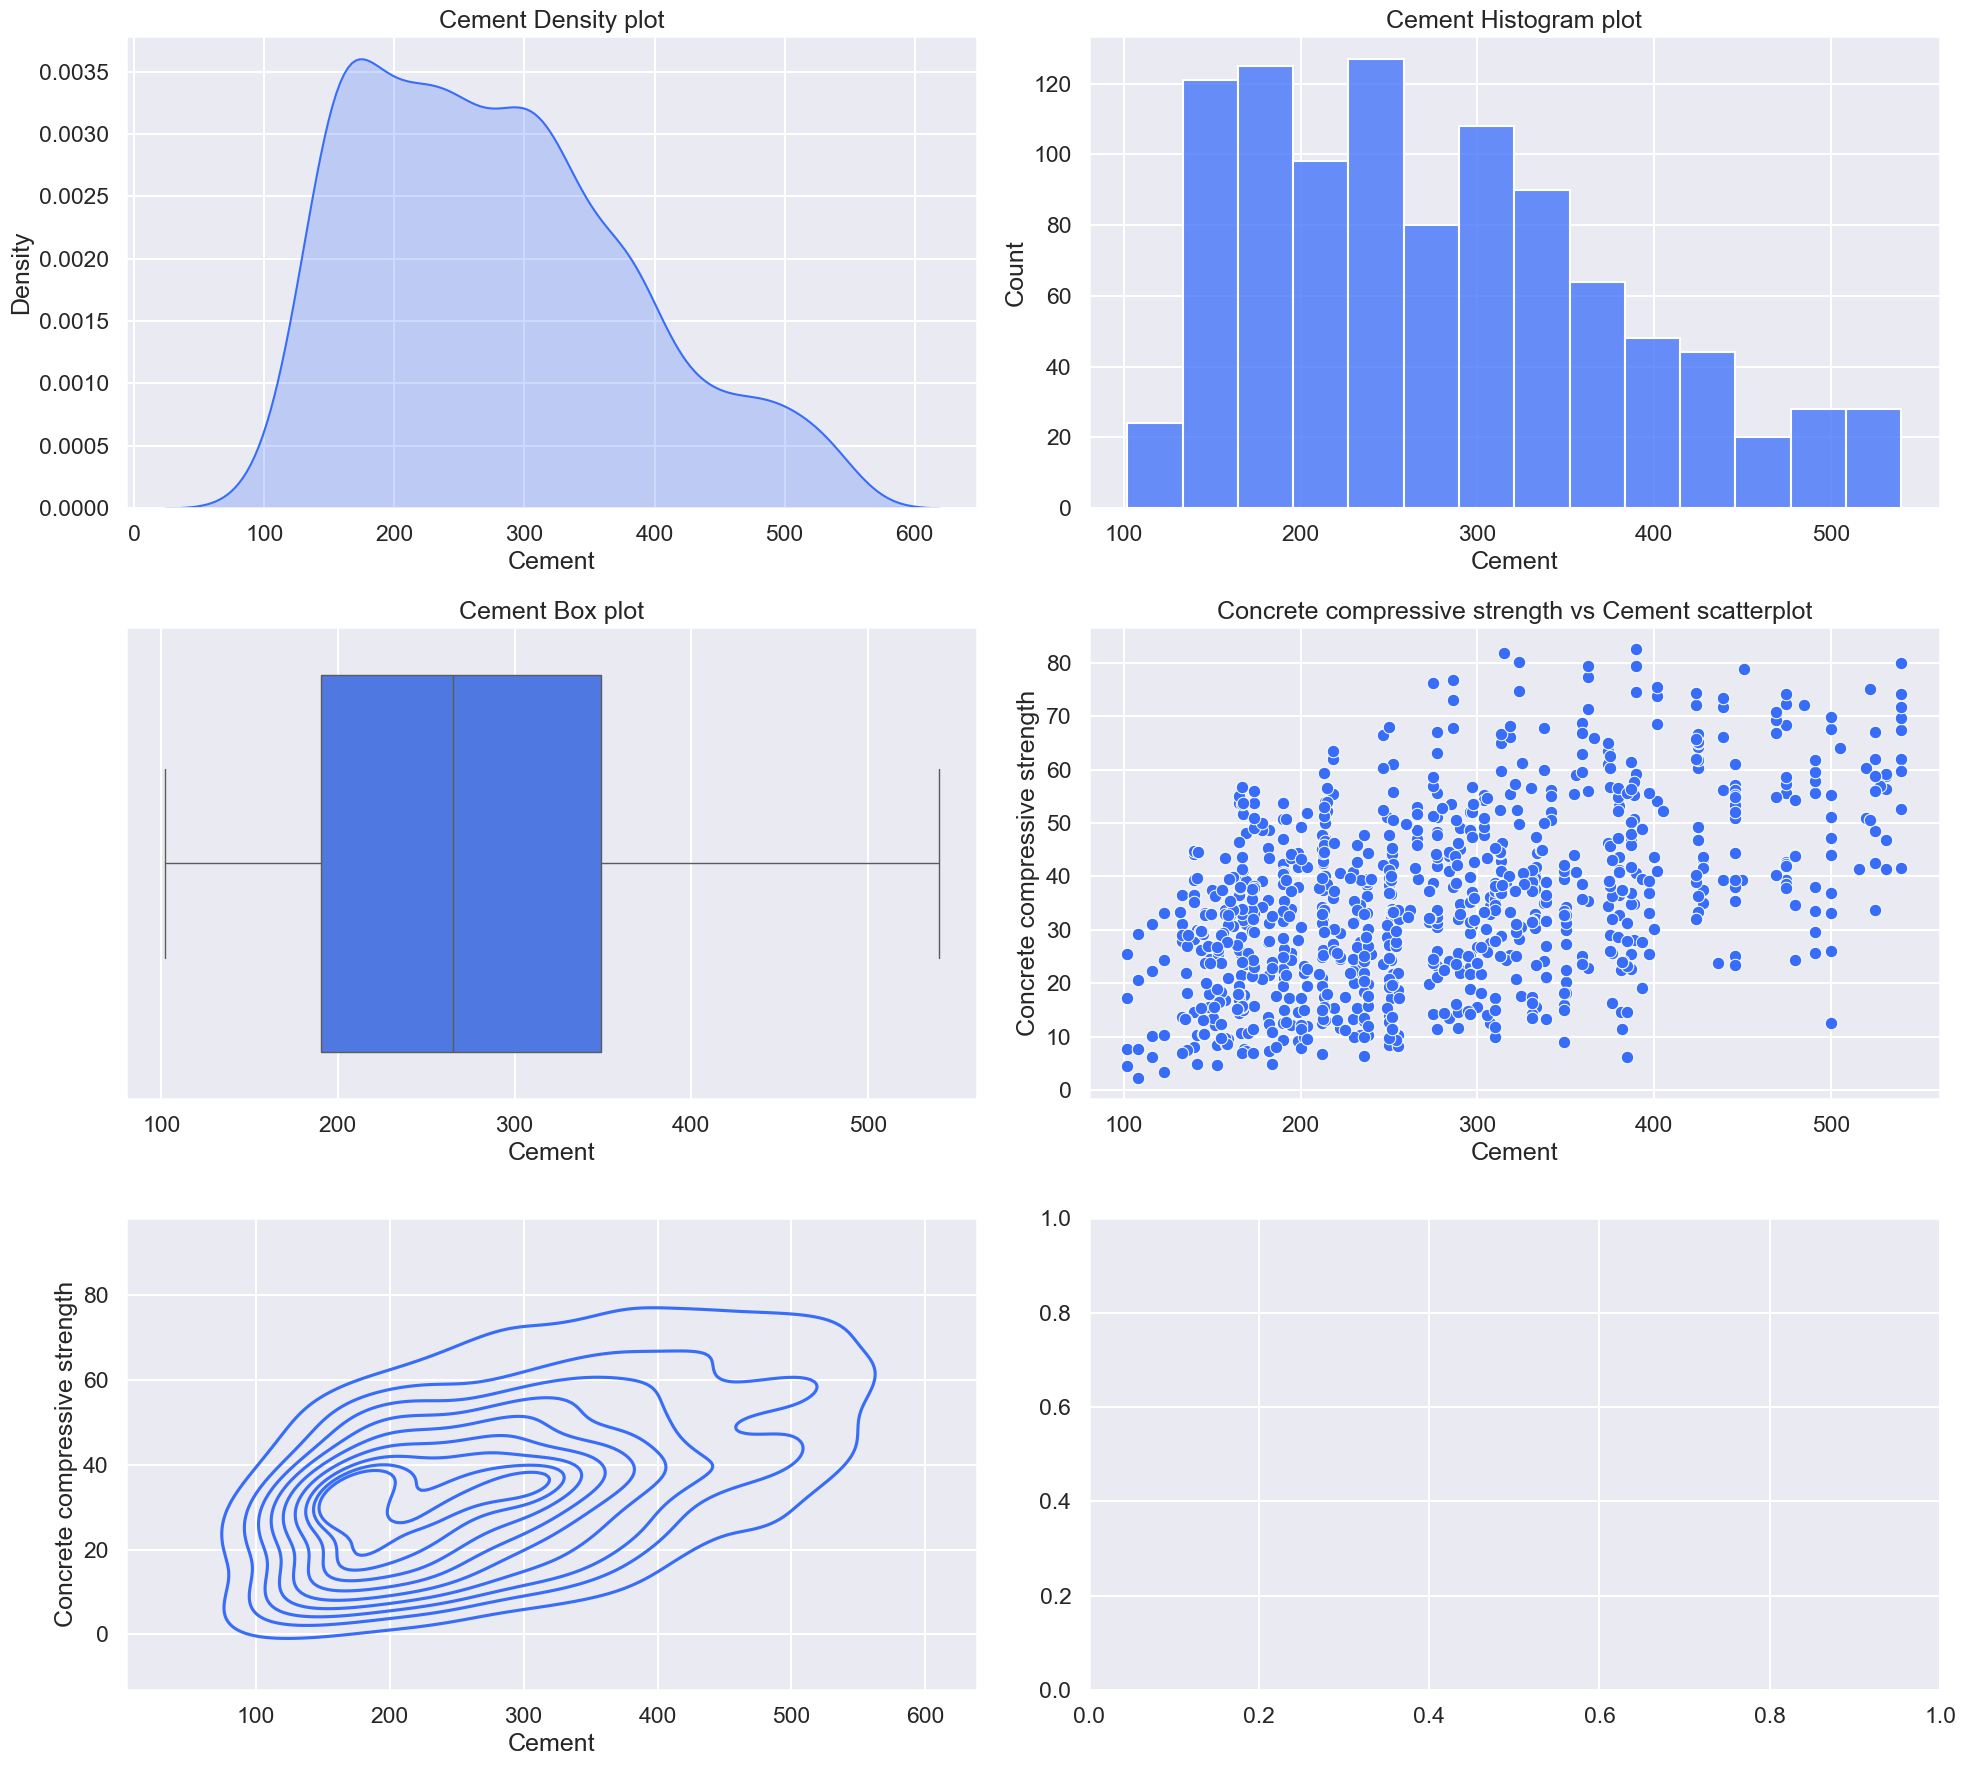

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))

sns.kdeplot(x="Cement", data=dataframe, fill=True,ax=axes[0][0])
axes[0][0].set_title("Cement Density plot")

sns.histplot(x="Cement", data=dataframe, ax=axes[0][1])
axes[0][1].set_title("Cement Histogram plot")

sns.boxplot( x="Cement", data=dataframe, ax=axes[1][0])
axes[1][0].set_title("Cement Box plot")


sns.scatterplot(y=target_col, x="Cement", data=dataframe, ax=axes[1][1])
axes[1][1].set_title(f"{target_col} vs Cement scatterplot")


sns.kdeplot(dataframe, x="Cement", y=target_col, ax=axes[2][0])


plt.tight_layout()
plt.show()
# sns.pairplot(dataframe[['Concrete_compressive_strength', 'Cement']], height=4, aspect=1.75)


#### Blast_Furnace_Slag Column + and Blast_Furnace_Slag vs target Columns

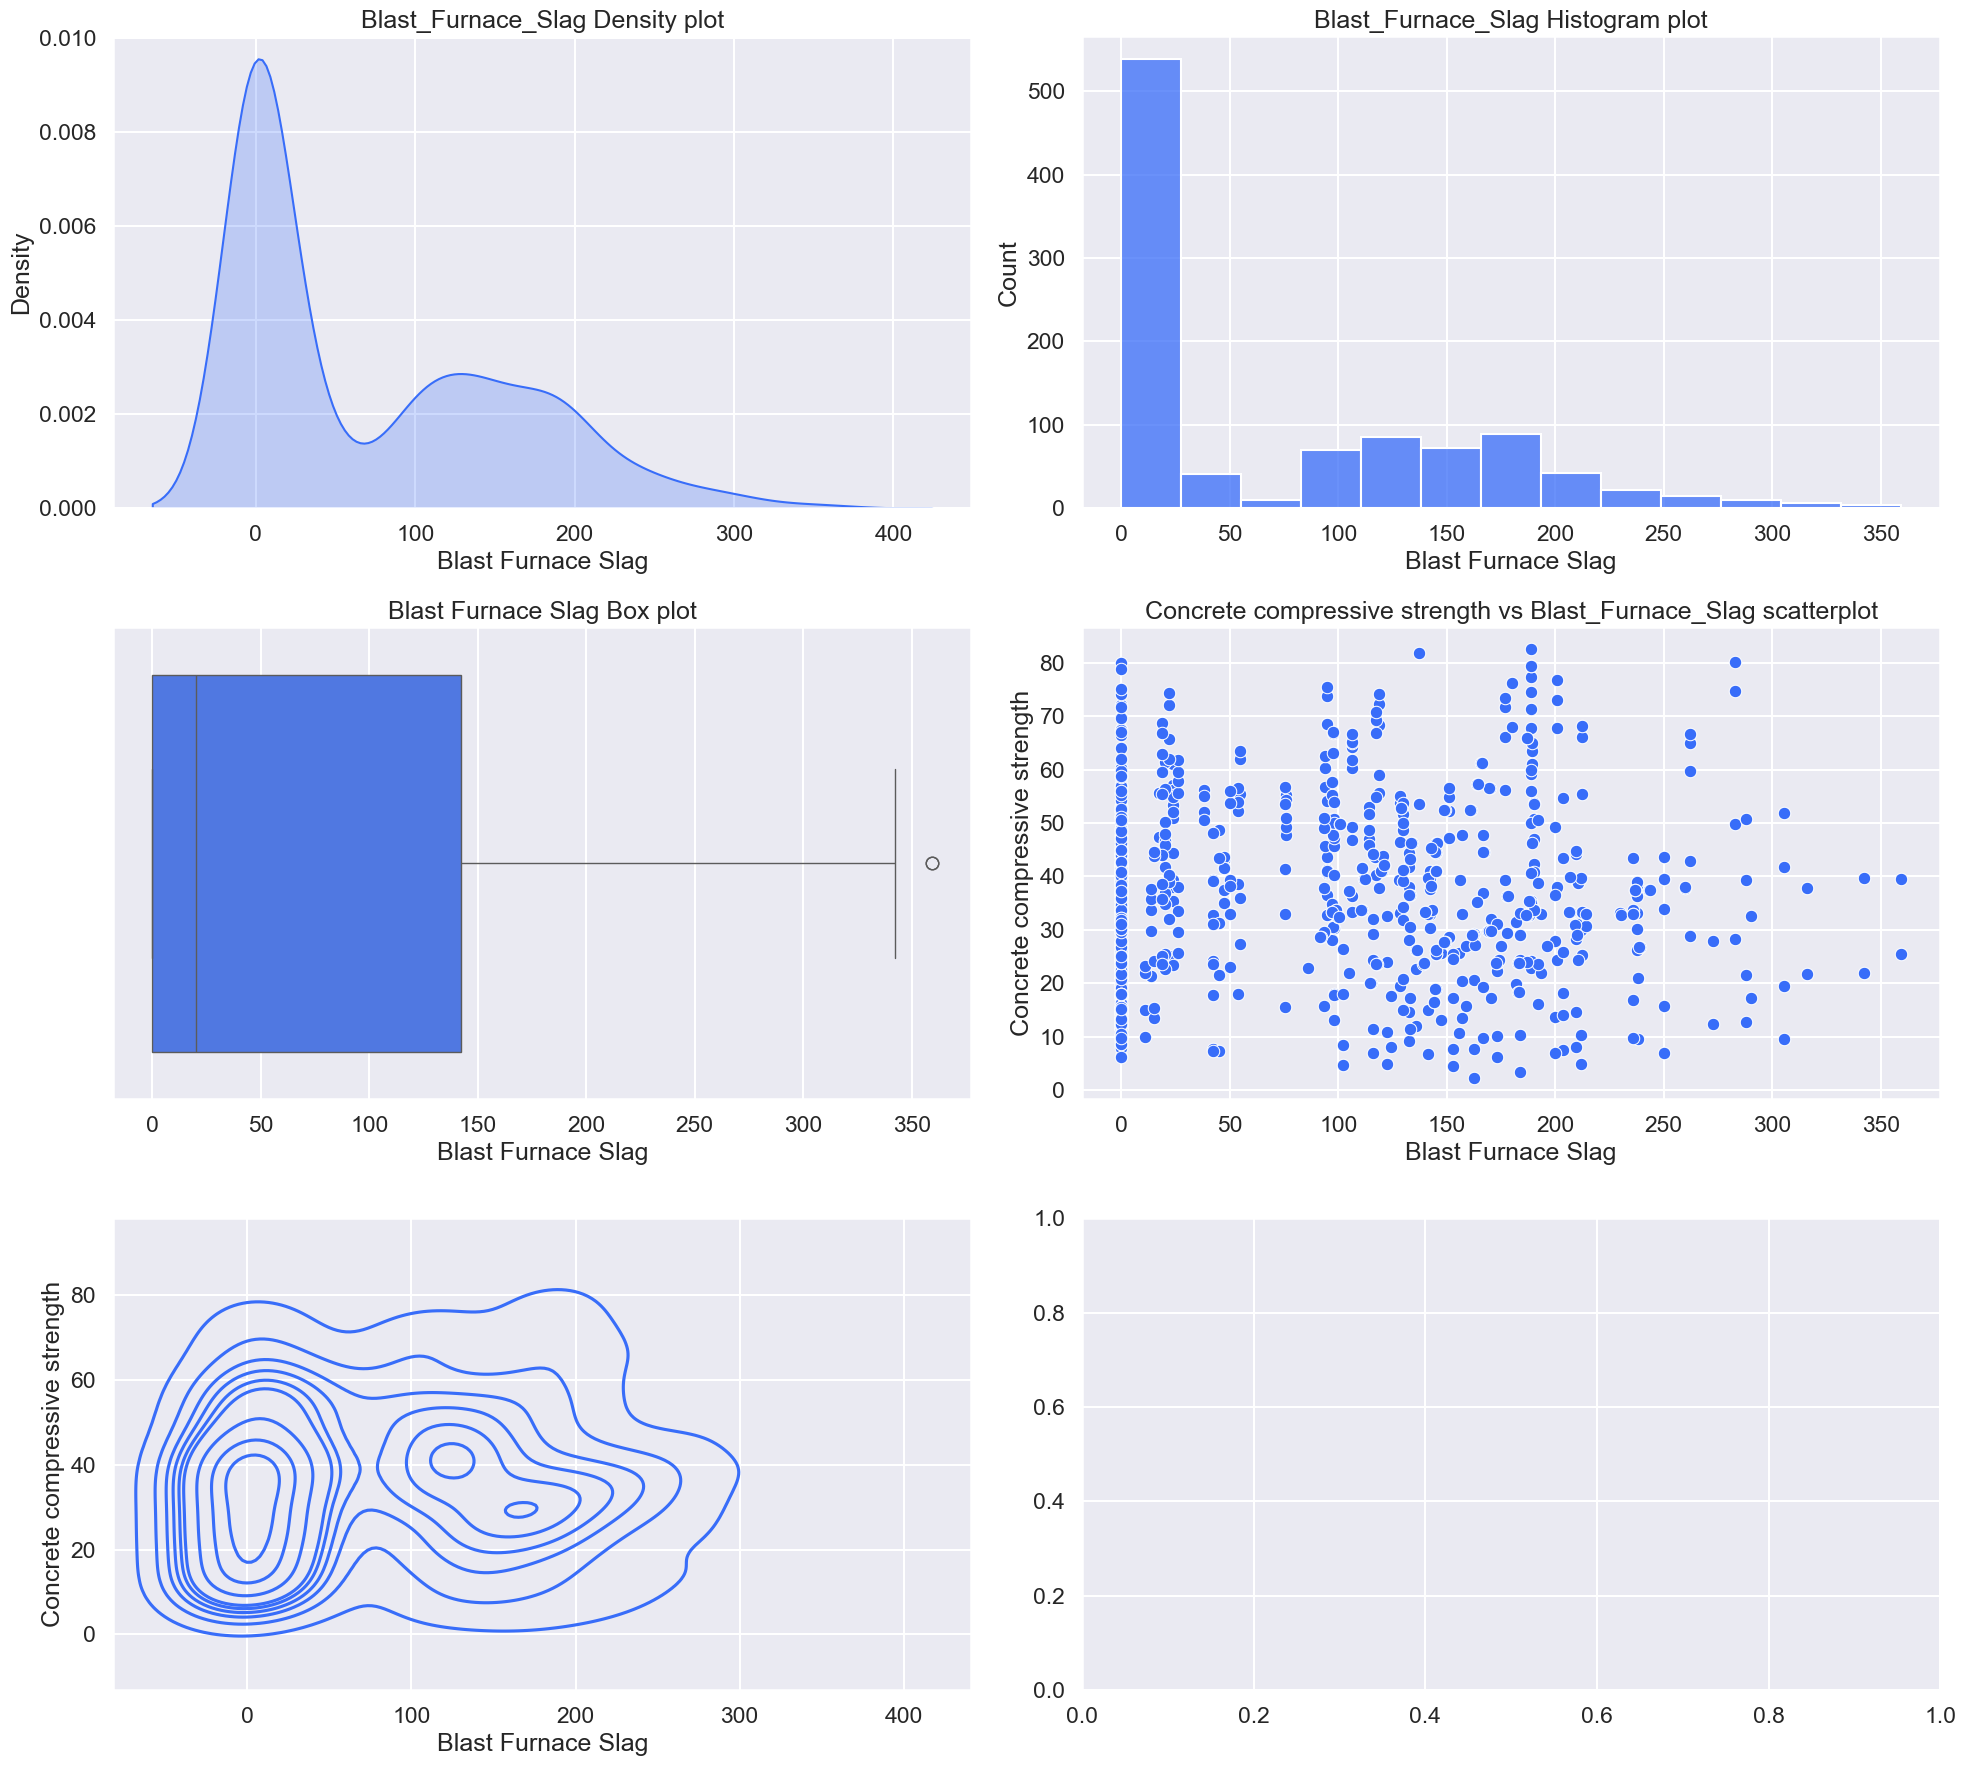

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))

sns.kdeplot(x="Blast Furnace Slag", data=dataframe,fill=True, ax=axes[0][0])
axes[0][0].set_title("Blast_Furnace_Slag Density plot")

sns.histplot(x="Blast Furnace Slag", data=dataframe, ax=axes[0][1])
axes[0][1].set_title("Blast_Furnace_Slag Histogram plot")


sns.boxplot( x="Blast Furnace Slag", data=dataframe, ax=axes[1][0])
axes[1][0].set_title("Blast Furnace Slag Box plot")

sns.scatterplot(y=target_col, x="Blast Furnace Slag", data=dataframe, ax=axes[1][1])
axes[1][1].set_title(f"{target_col} vs Blast_Furnace_Slag scatterplot")


sns.kdeplot(dataframe, x="Blast Furnace Slag", y=target_col, ax=axes[2][0])

plt.tight_layout()
plt.show()
# sns.pairplot(dataframe[['Concrete_compressive_strength', 'Blast_Furnace_Slag']], height=4, aspect=1.75)


#### Fly_Ash + Fly_Ash Vs target Columns


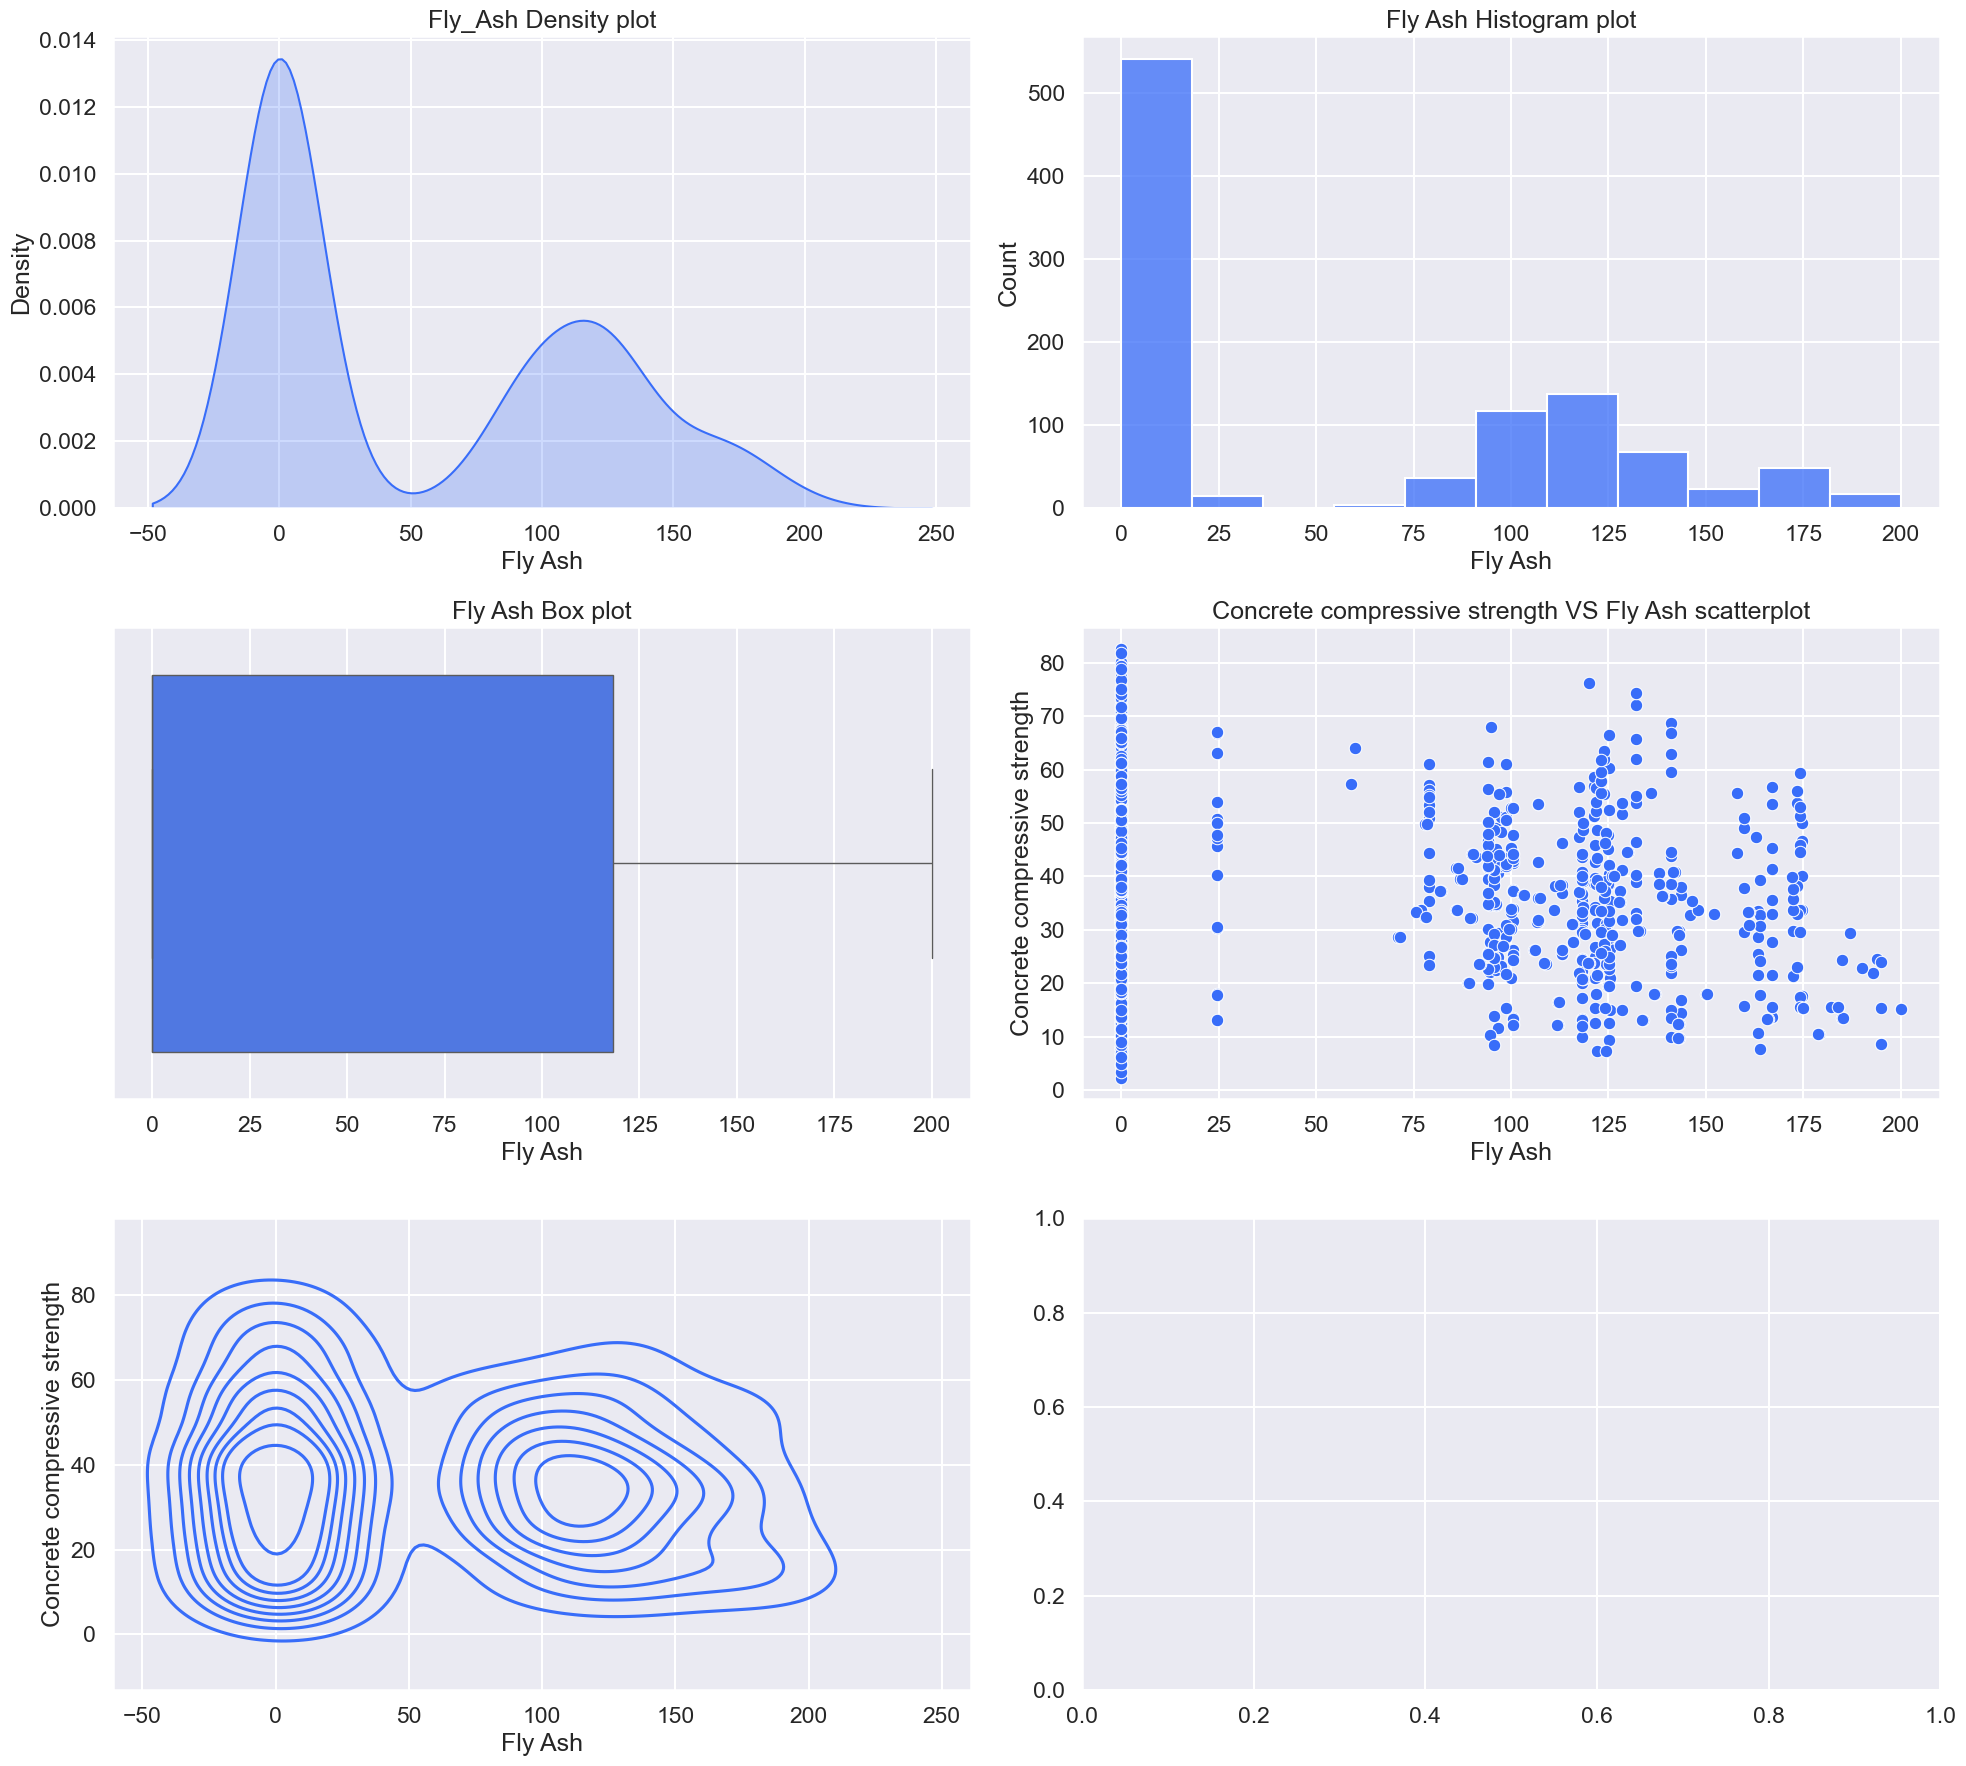

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))

sns.kdeplot(x="Fly Ash", data=dataframe,fill=True, ax=axes[0][0])
axes[0][0].set_title("Fly_Ash Density plot")

sns.histplot(x="Fly Ash", data=dataframe, ax=axes[0][1])
axes[0][1].set_title("Fly Ash Histogram plot")

sns.boxplot( x="Fly Ash", data=dataframe, ax=axes[1][0])
axes[1][0].set_title("Fly Ash Box plot")

sns.scatterplot(y=target_col, x="Fly Ash", data=dataframe, ax=axes[1][1])
axes[1][1].set_title(f"{target_col} VS Fly Ash scatterplot")

sns.kdeplot(dataframe, x="Fly Ash", y=target_col, ax=axes[2][0])

plt.tight_layout()
plt.show()

# sns.pairplot(dataframe[['Concrete_compressive_strength', 'Fly_Ash']], height=4, aspect=1.75)

#### Superplasticizer +  Superplasticizer  vs target Columns


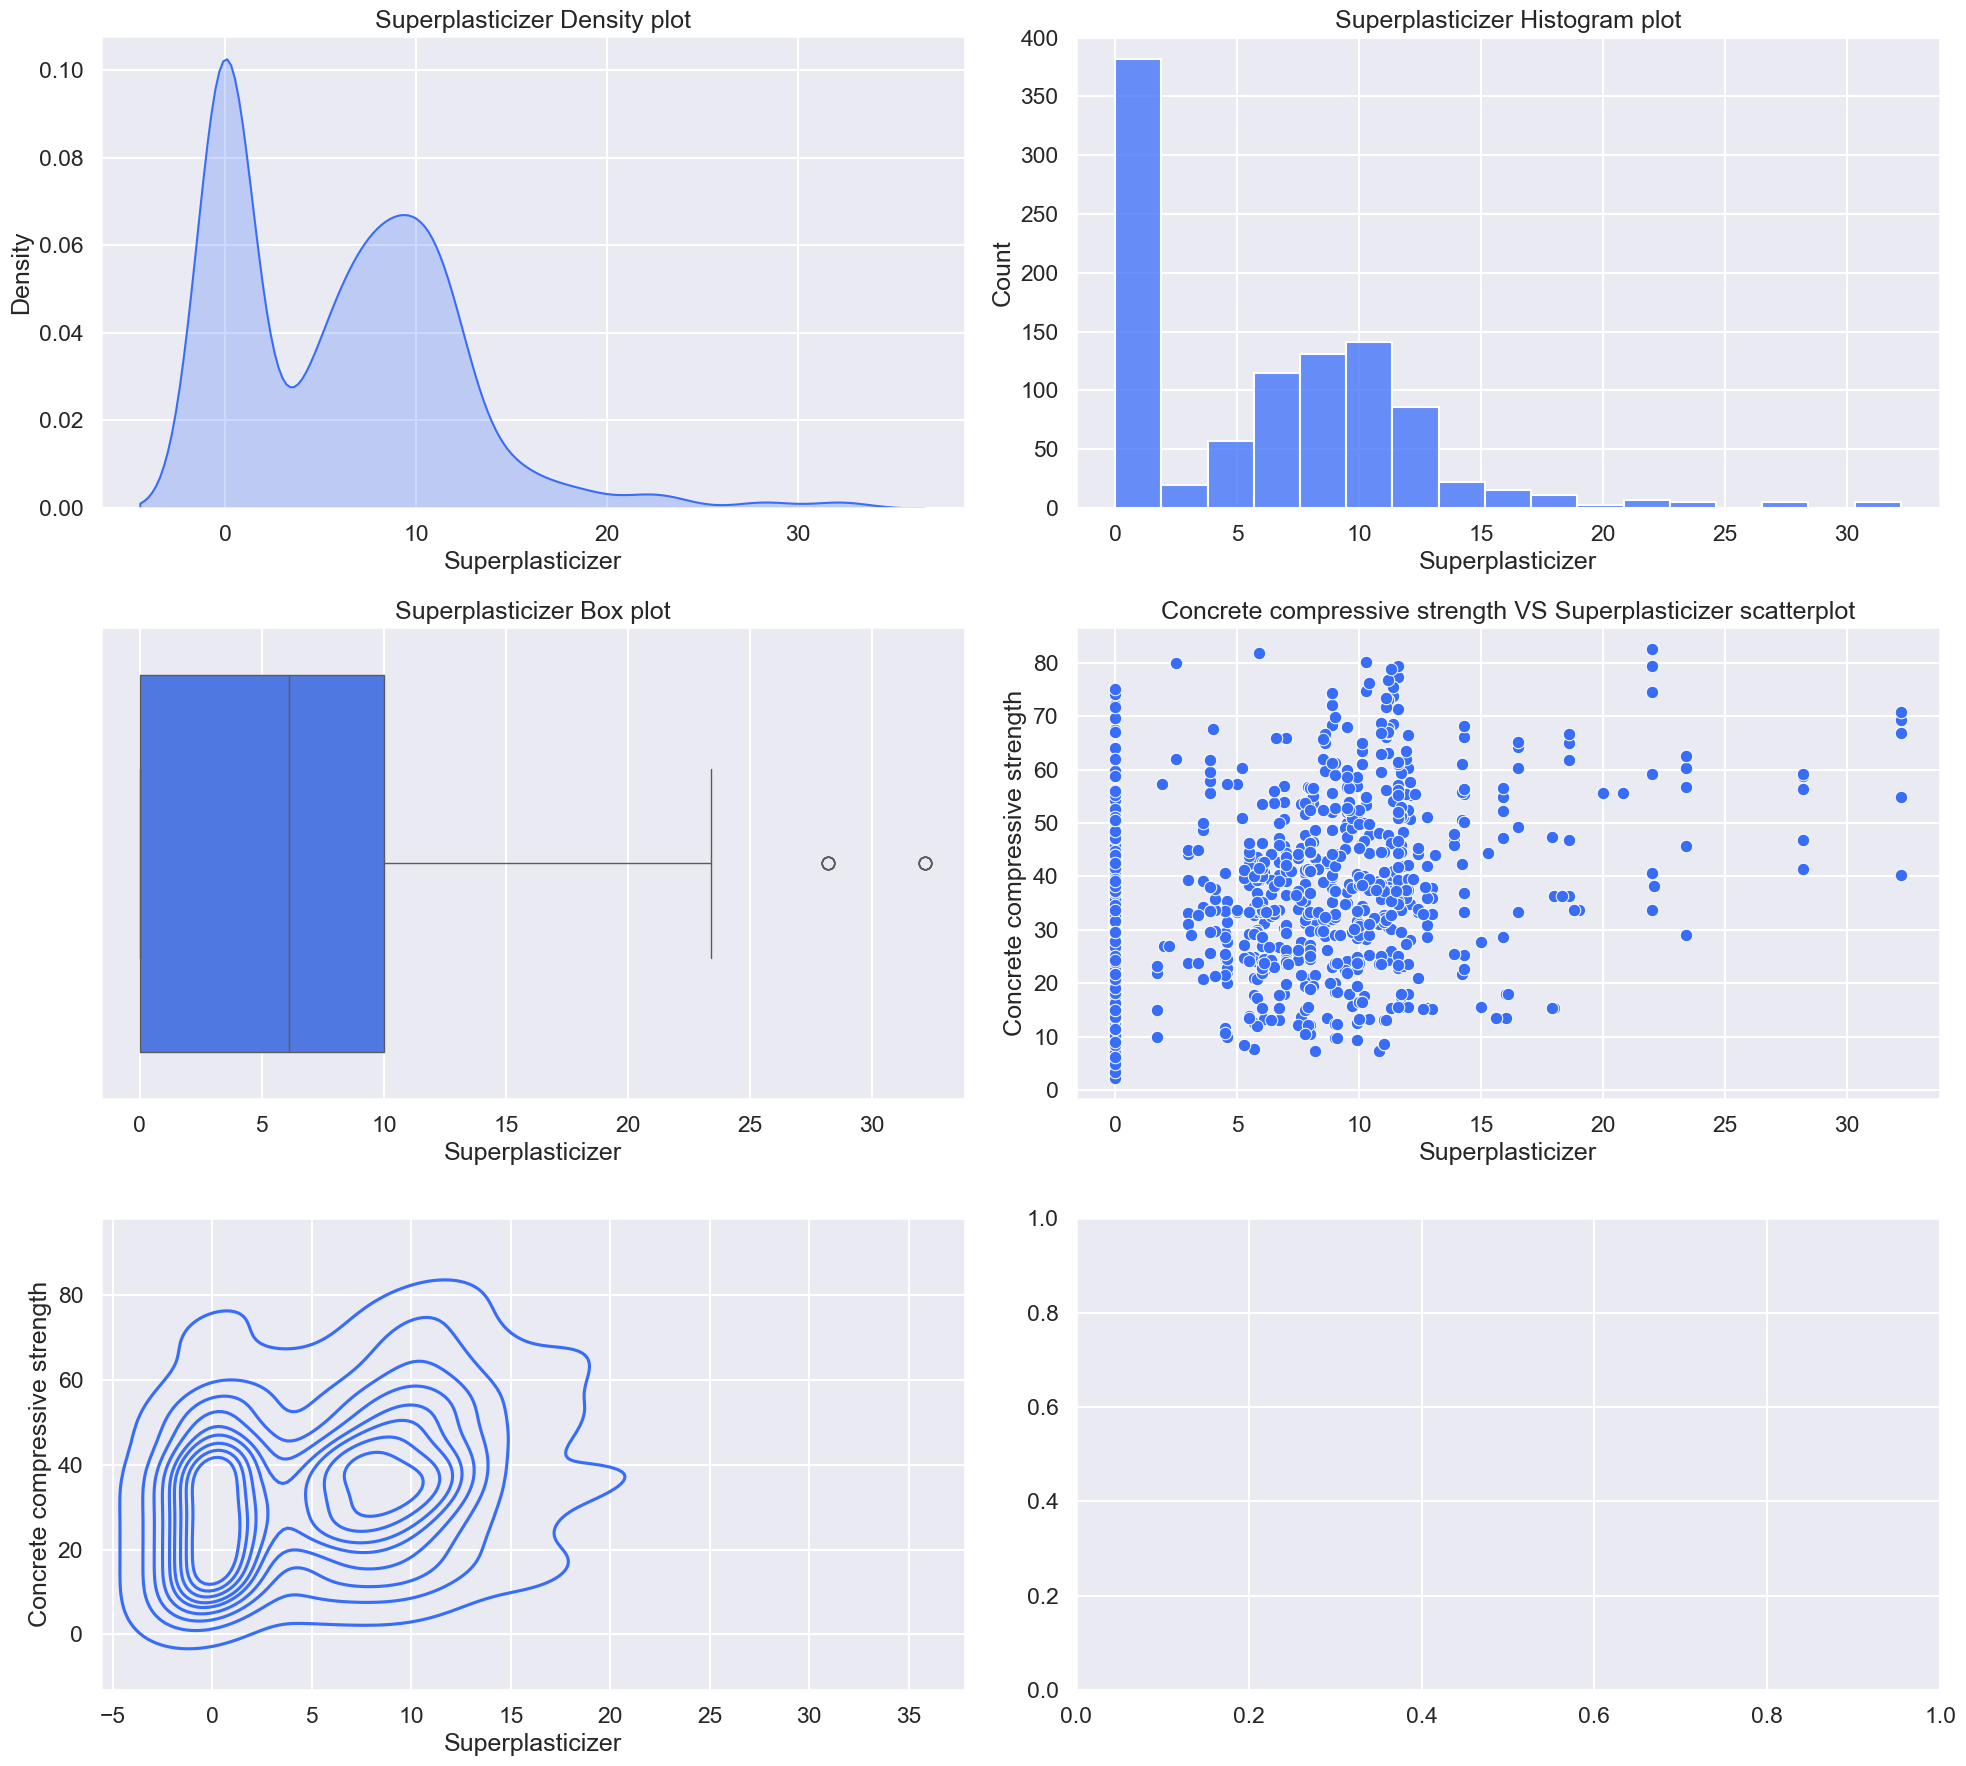

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))

sns.kdeplot(x="Superplasticizer", data=dataframe,fill=True, ax=axes[0][0])
axes[0][0].set_title("Superplasticizer Density plot")

sns.histplot(x="Superplasticizer", data=dataframe, ax=axes[0][1])
axes[0][1].set_title("Superplasticizer Histogram plot")


sns.boxplot( x="Superplasticizer", data=dataframe, ax=axes[1][0])
axes[1][0].set_title("Superplasticizer Box plot")

sns.scatterplot(y=target_col, x="Superplasticizer", data=dataframe, ax=axes[1][1])
axes[1][1].set_title(f"{target_col} VS Superplasticizer scatterplot")



sns.kdeplot(dataframe, x="Superplasticizer", y=target_col, ax=axes[2][0])

plt.tight_layout()
plt.show()

# sns.pairplot(dataframe[['Concrete_compressive_strength', 'Superplasticizer']], height=4, aspect=1.75)


#### Coarse_Aggregate + Coarse_Aggregate vs target Columns


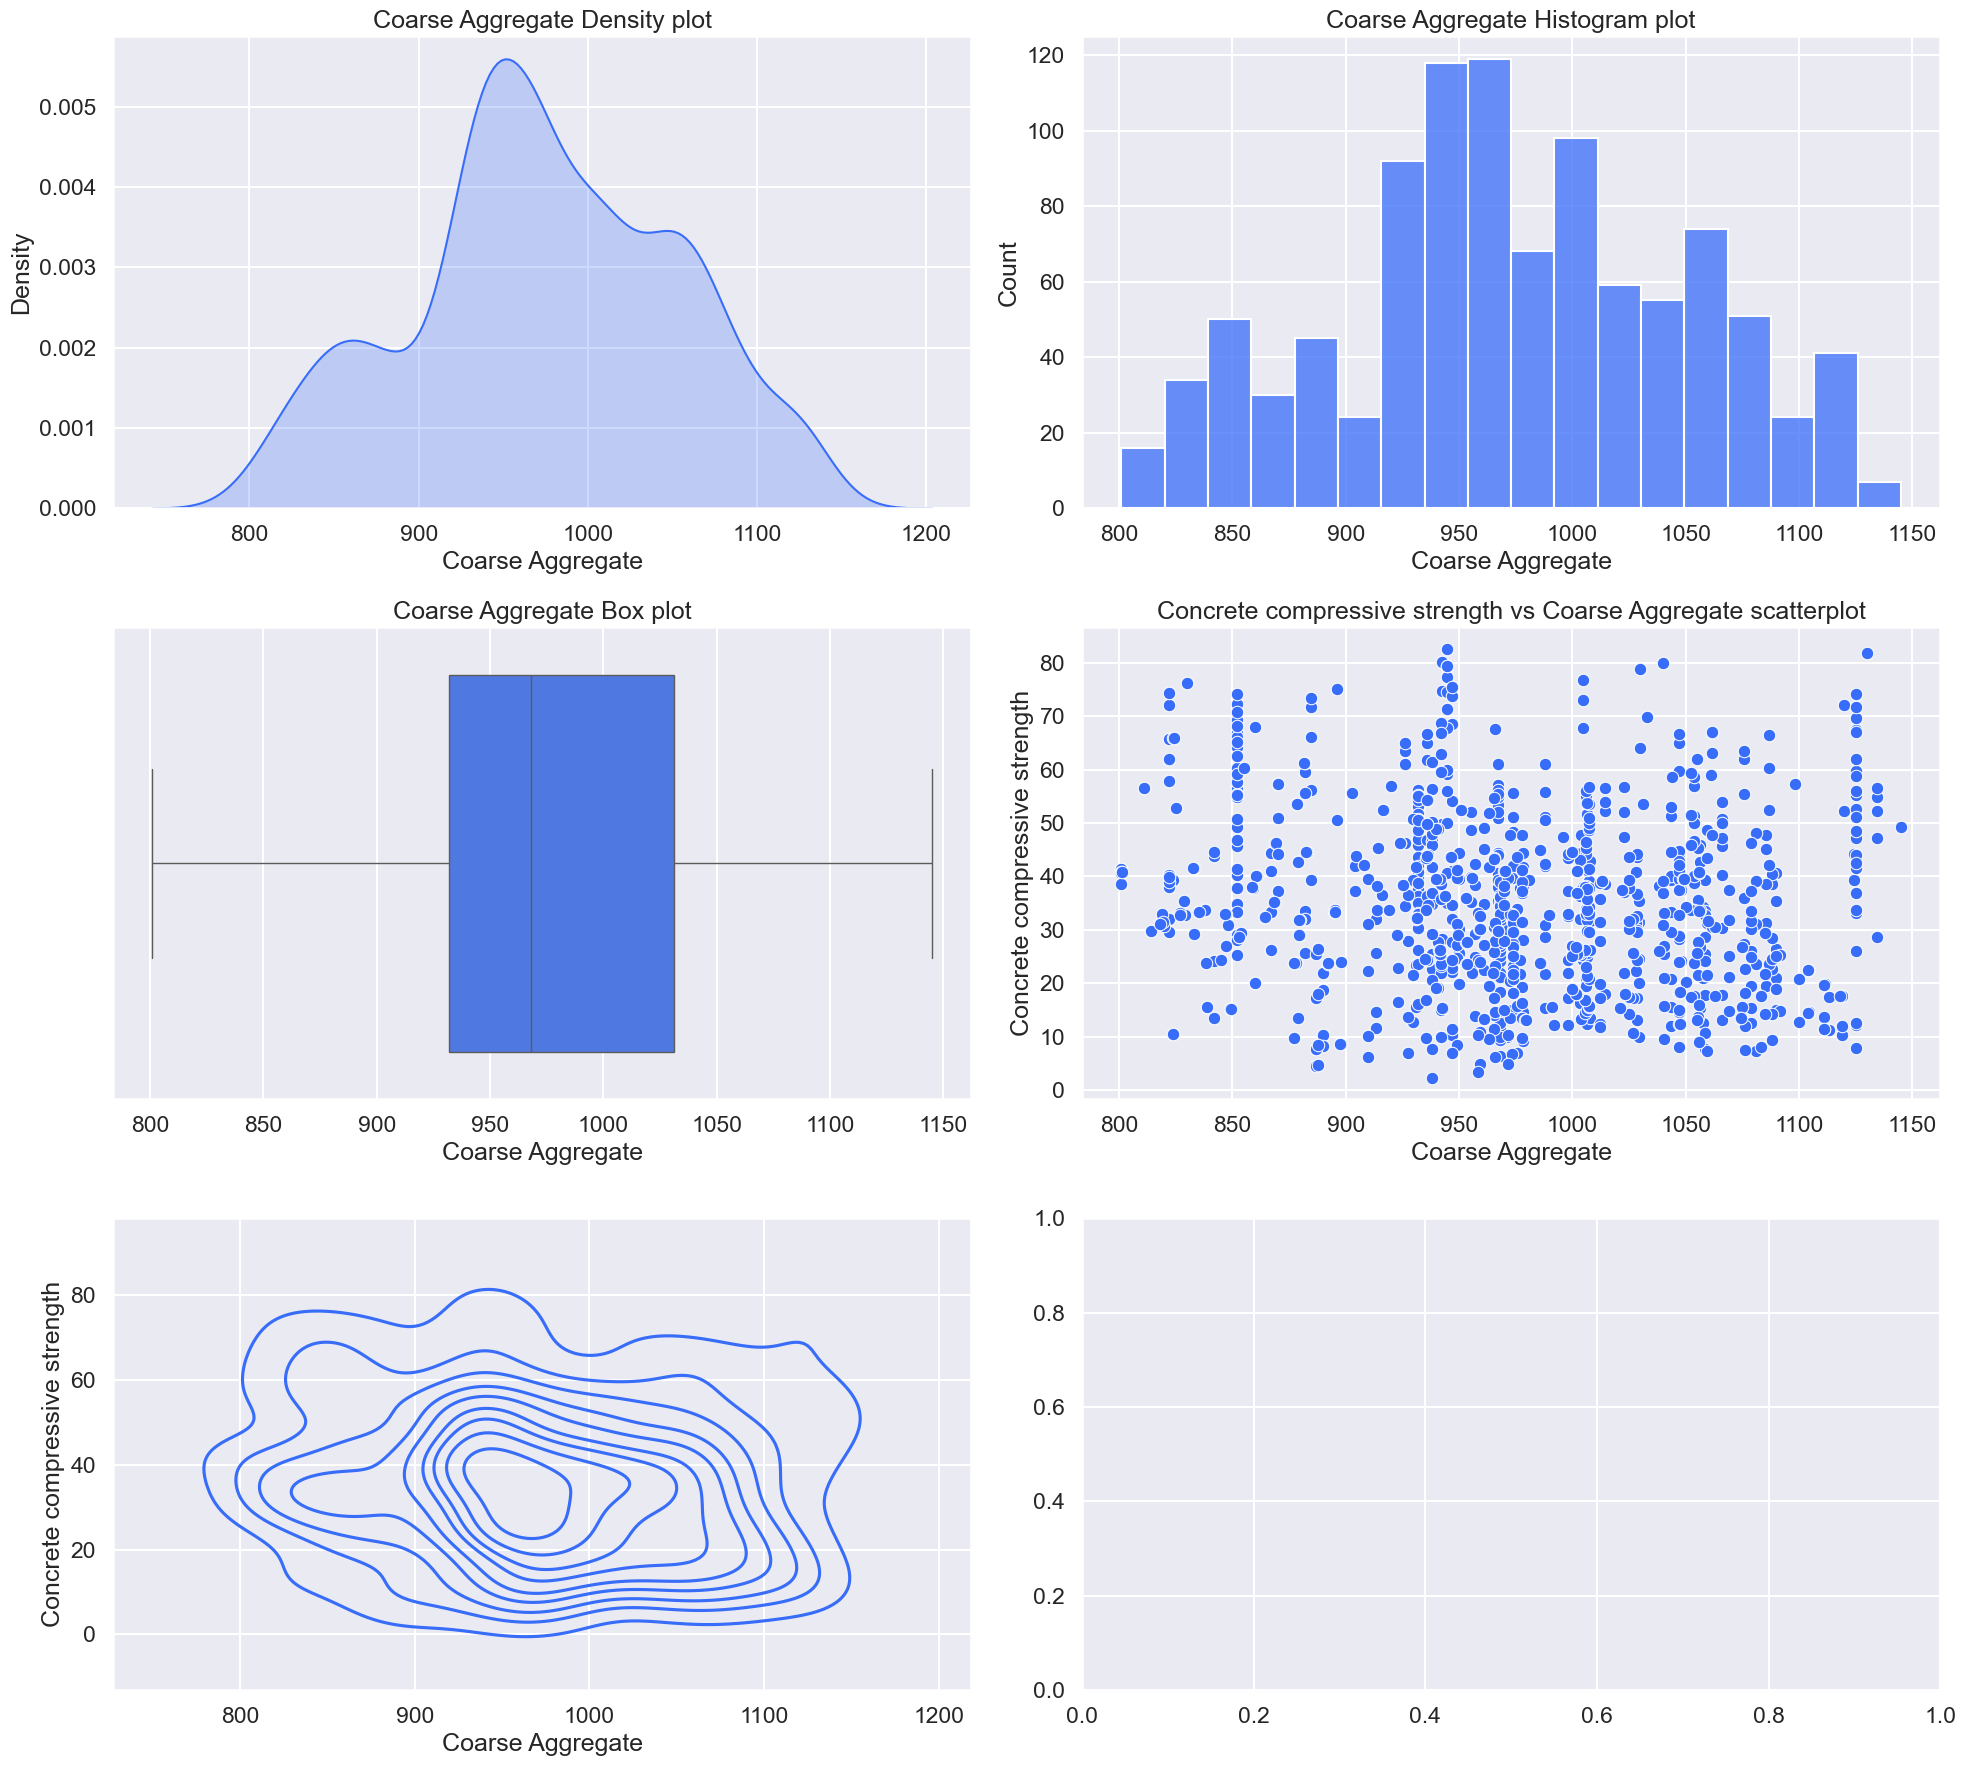

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))

sns.kdeplot(x="Coarse Aggregate", data=dataframe,fill=True, ax=axes[0][0])
axes[0][0].set_title("Coarse Aggregate Density plot")

sns.histplot(x="Coarse Aggregate", data=dataframe, ax=axes[0][1])
axes[0][1].set_title("Coarse Aggregate Histogram plot")


sns.boxplot( x="Coarse Aggregate", data=dataframe, ax=axes[1][0])
axes[1][0].set_title("Coarse Aggregate Box plot")

sns.scatterplot(y=target_col, x="Coarse Aggregate", data=dataframe, ax=axes[1][1])
axes[1][1].set_title(f"{target_col} vs Coarse Aggregate scatterplot")


sns.kdeplot(dataframe, x="Coarse Aggregate", y=target_col, ax=axes[2][0])

plt.tight_layout()
plt.show()

# sns.pairplot(dataframe[['Concrete_compressive_strength', 'Coarse_Aggregate']], height=4, aspect=1.75)


#### Fine_Aggregate + Fine_Aggregate vs target Columns


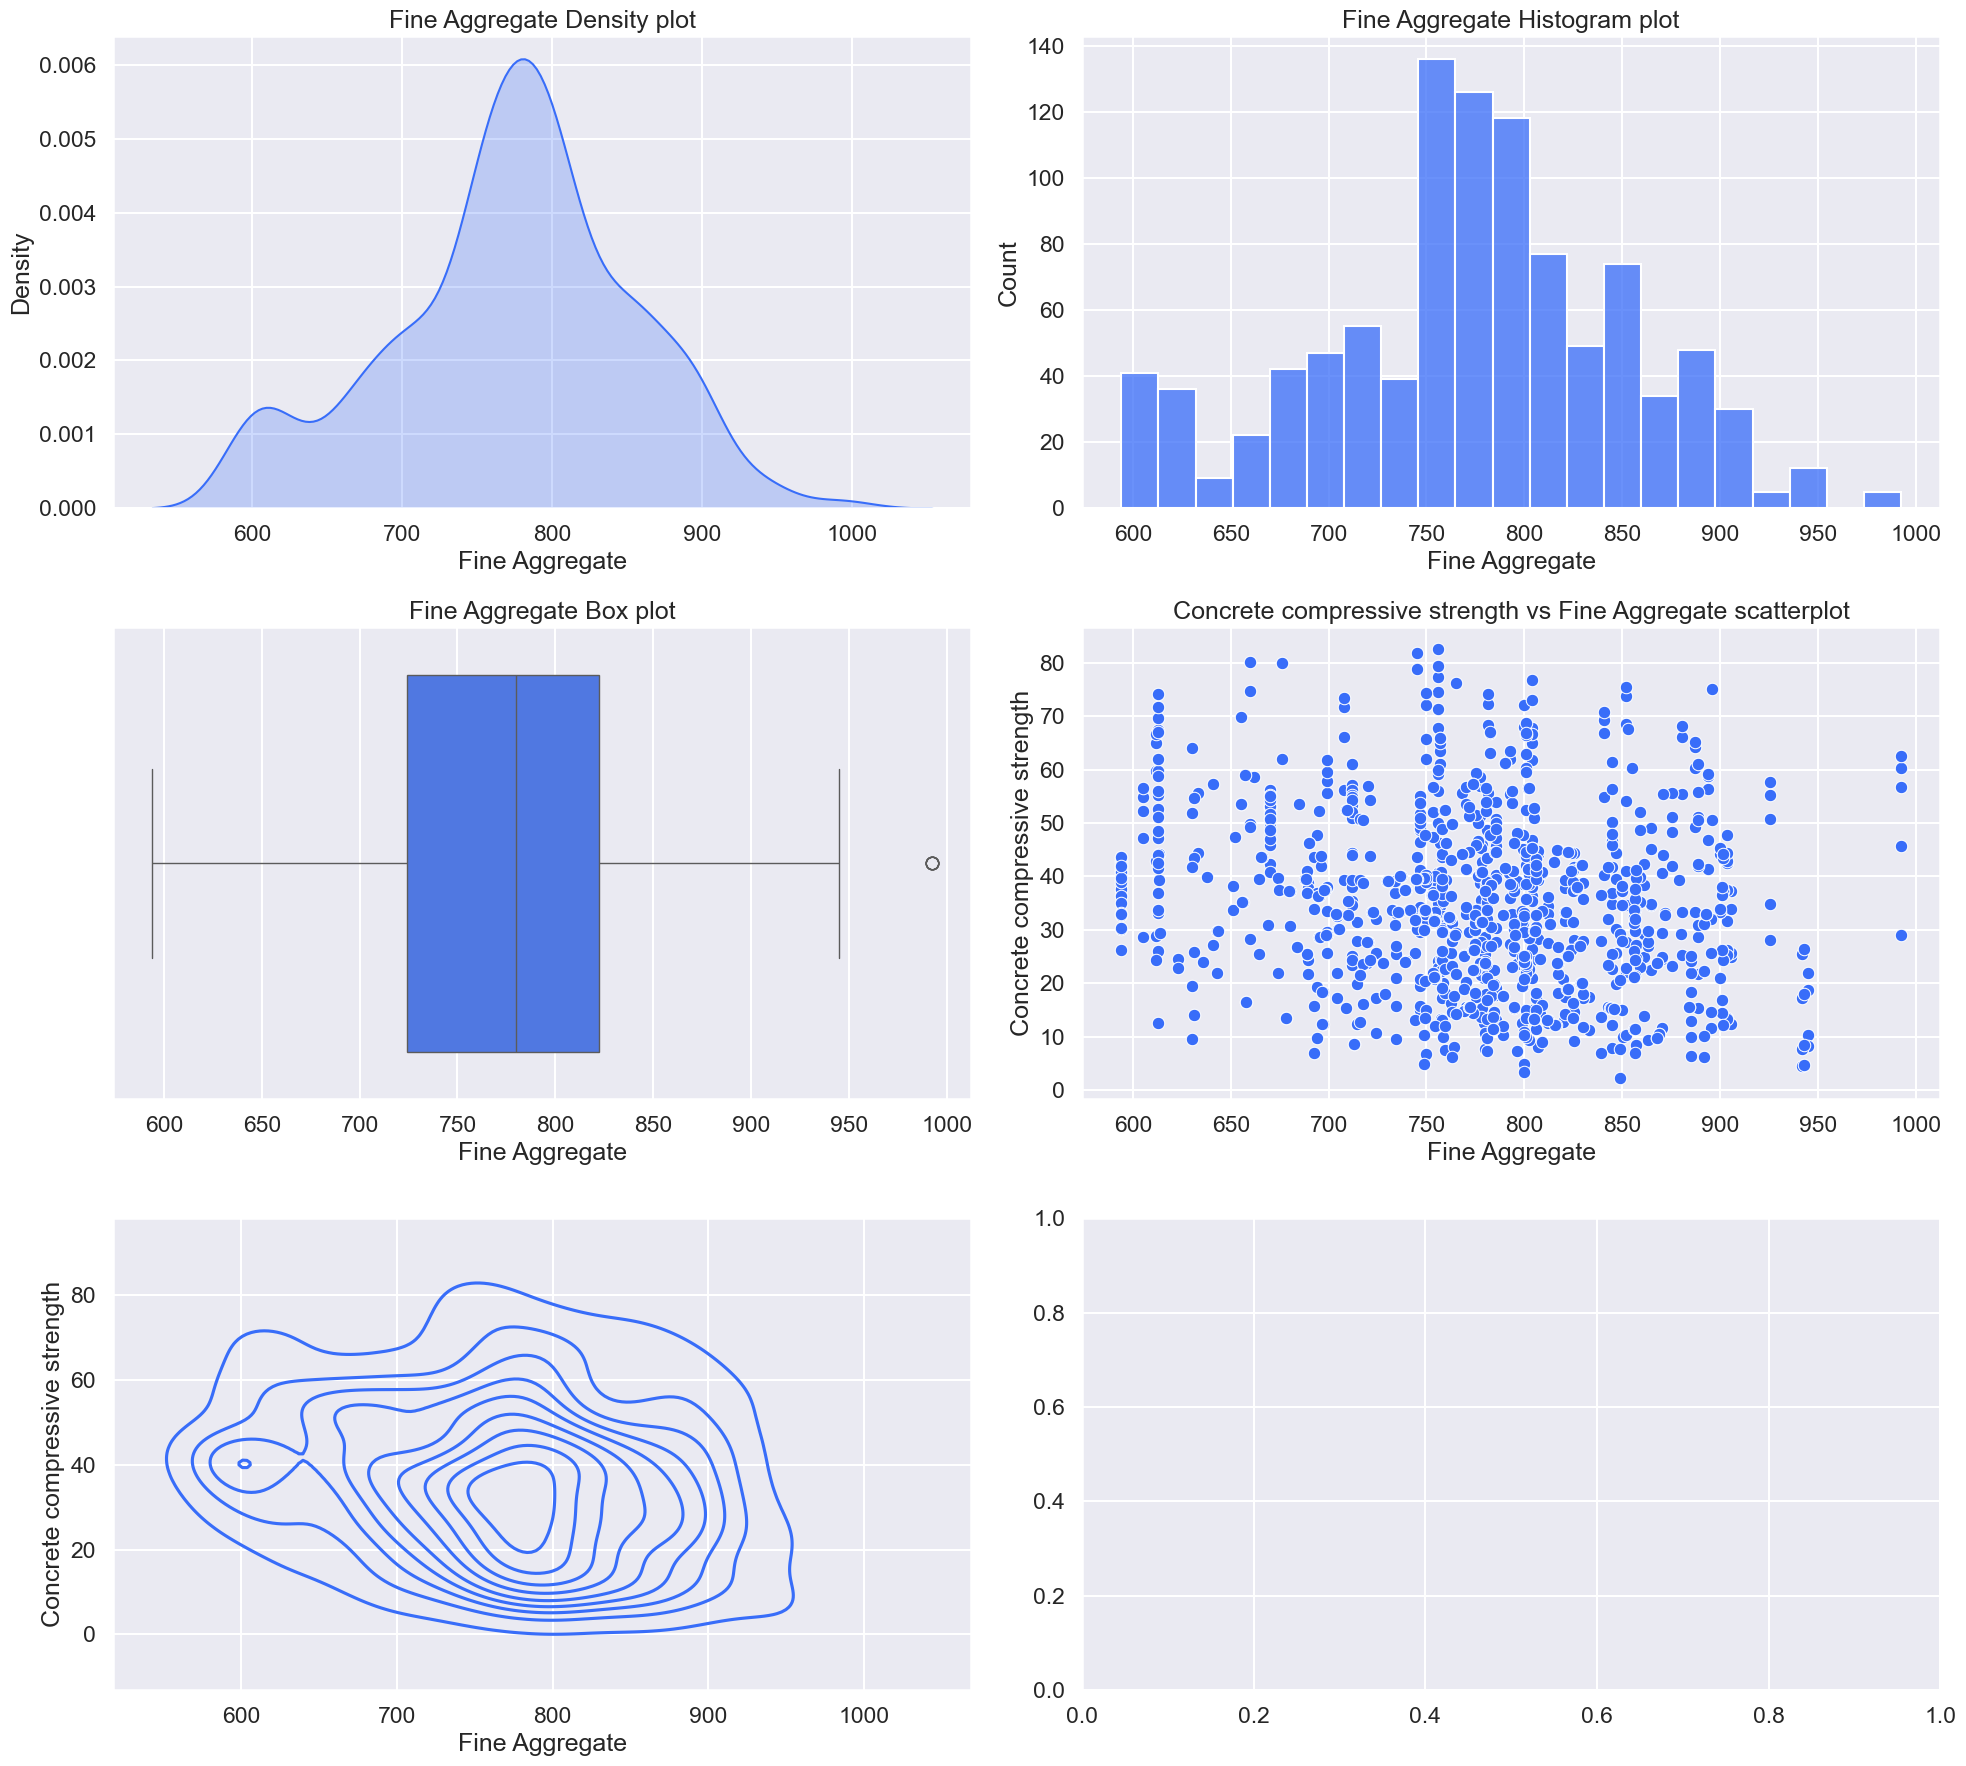

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))

sns.kdeplot(x="Fine Aggregate", data=dataframe, fill=True,ax=axes[0][0])
axes[0][0].set_title("Fine Aggregate Density plot")

sns.histplot(x="Fine Aggregate", data=dataframe, ax=axes[0][1])
axes[0][1].set_title("Fine Aggregate Histogram plot")

sns.boxplot( x="Fine Aggregate", data=dataframe, ax=axes[1][0])
axes[1][0].set_title("Fine Aggregate Box plot")


sns.scatterplot(y=target_col, x="Fine Aggregate", data=dataframe, ax=axes[1][1])
axes[1][1].set_title(f"{target_col} vs Fine Aggregate scatterplot")

sns.kdeplot(dataframe, x="Fine Aggregate", y=target_col, ax=axes[2][0])

plt.tight_layout()
plt.show()

# sns.pairplot(dataframe[['Concrete_compressive_strength', 'Fine_Aggregate']], height=4, aspect=1.75)



#### Age + Age vs target Columns


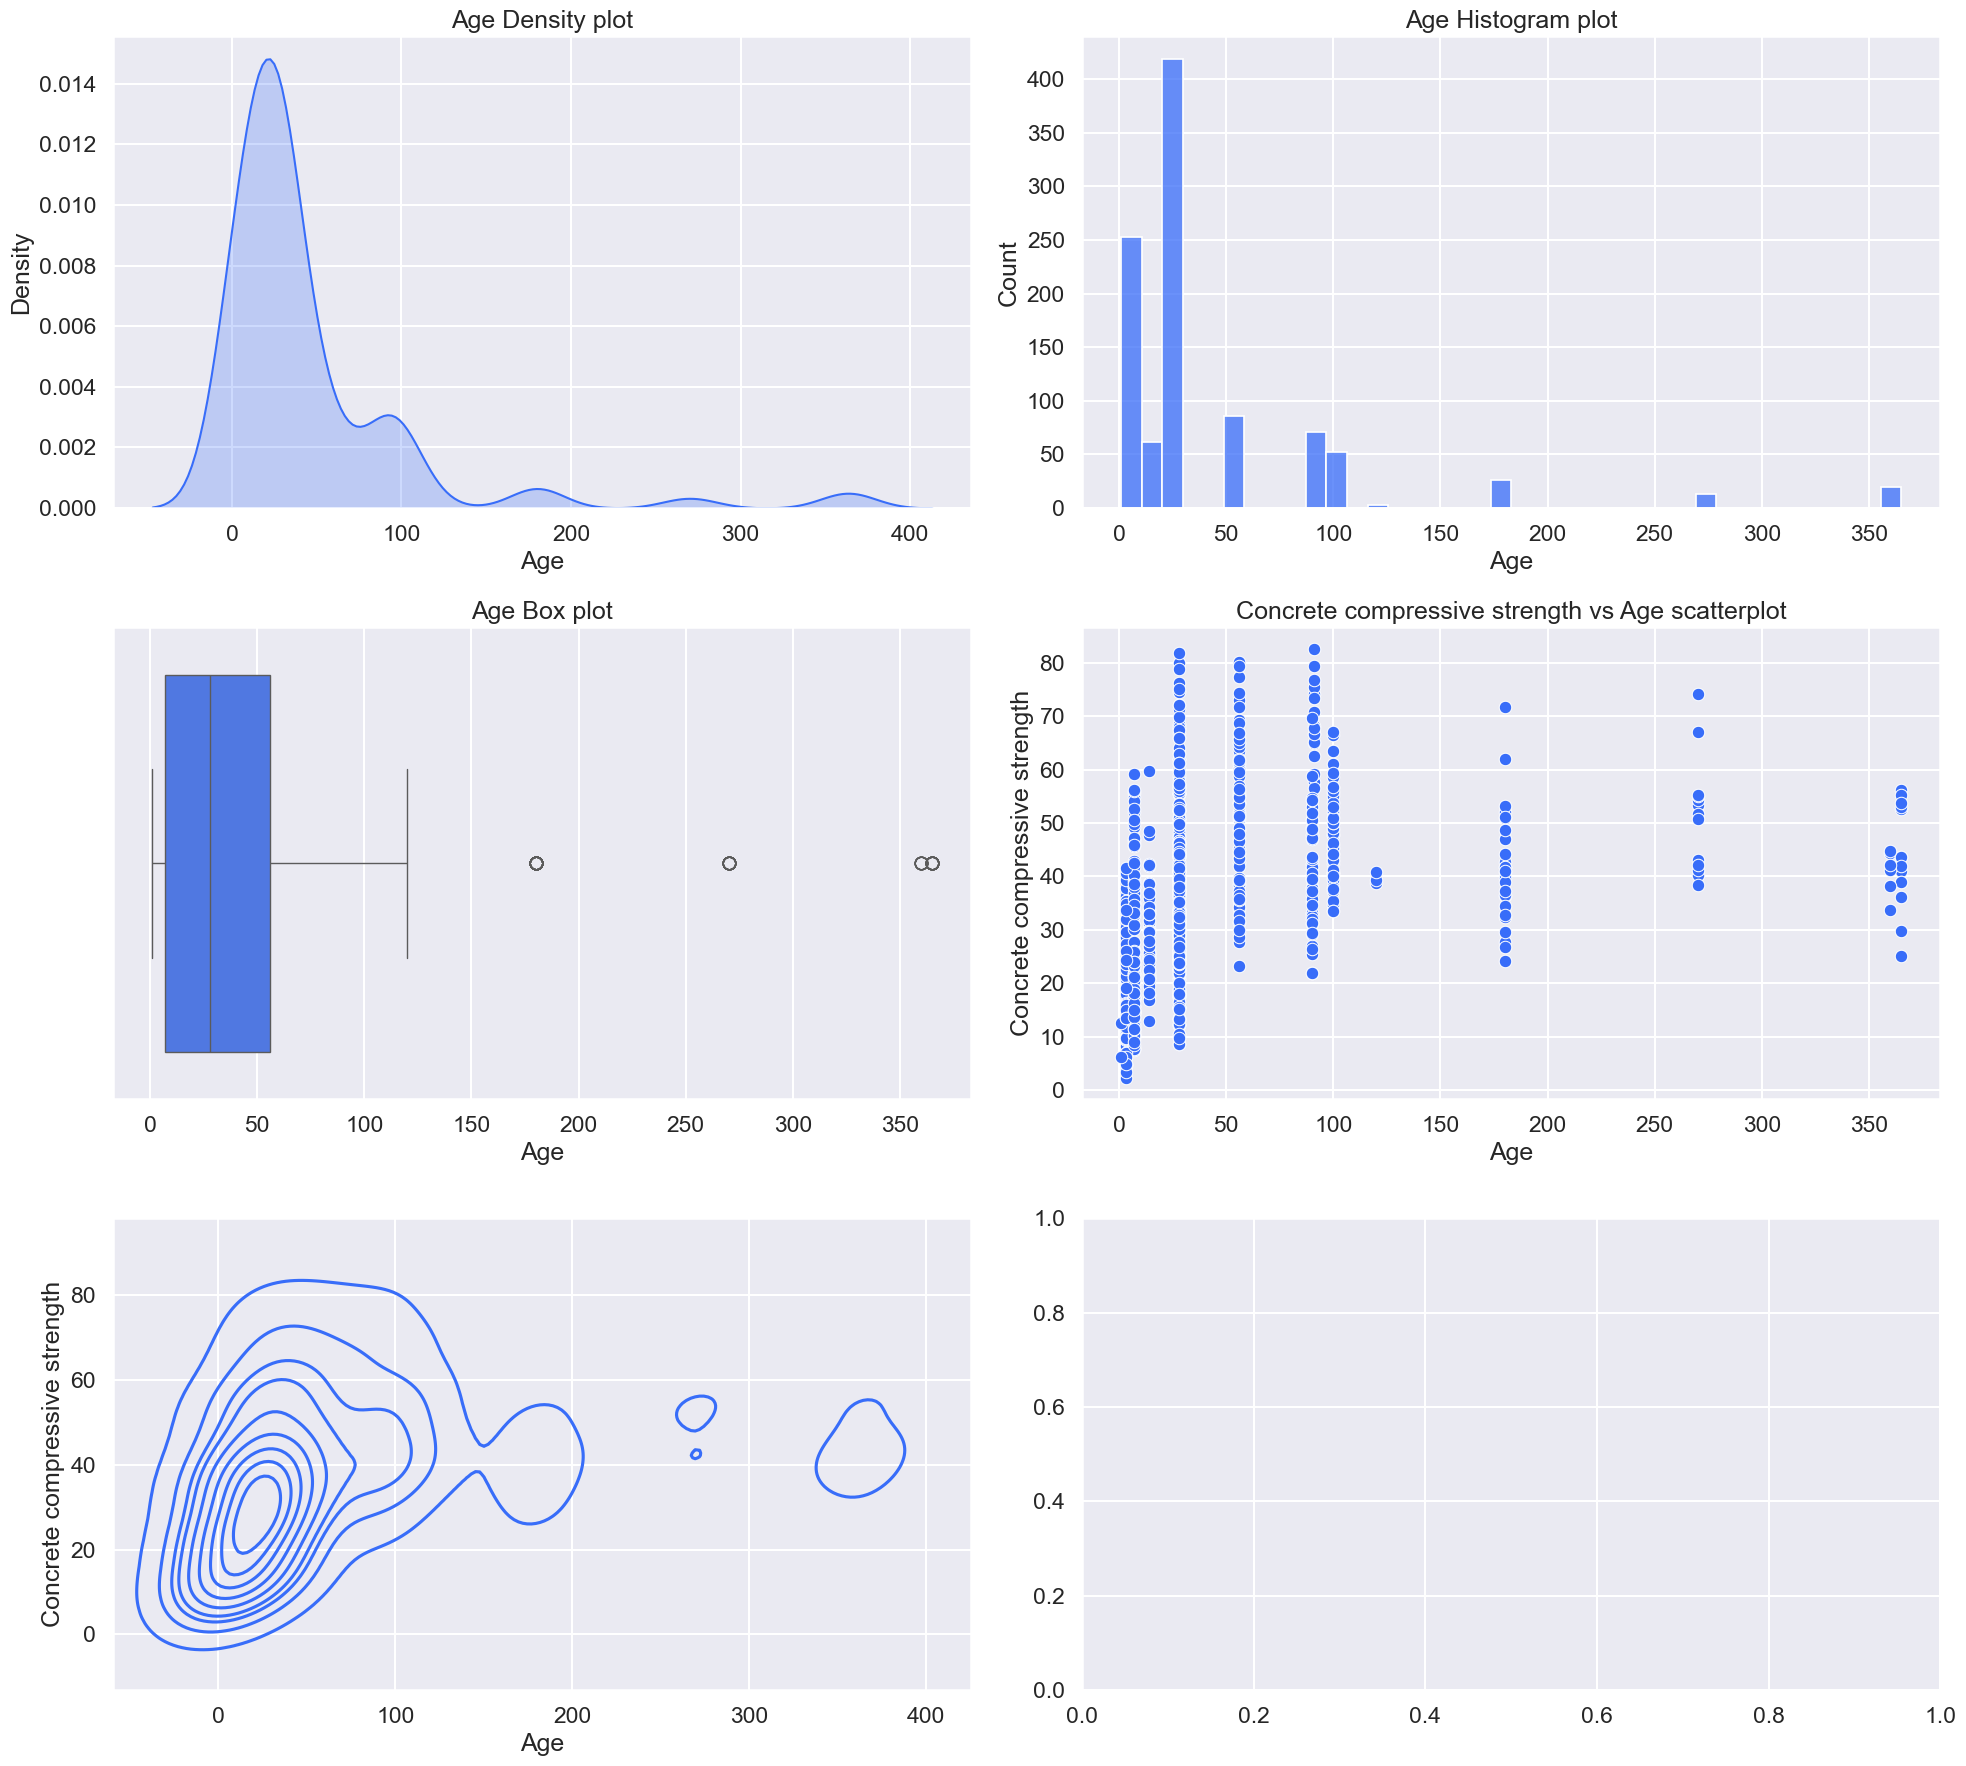

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))

sns.kdeplot(x="Age", data=dataframe,fill=True, ax=axes[0][0])
axes[0][0].set_title("Age Density plot")

sns.histplot(x="Age", data=dataframe, ax=axes[0][1])
axes[0][1].set_title("Age Histogram plot")

sns.boxplot( x="Age", data=dataframe, ax=axes[1][0])
axes[1][0].set_title("Age Box plot")

sns.scatterplot(y=target_col, x="Age", data=dataframe, ax=axes[1][1])
axes[1][1].set_title(f"{target_col} vs Age scatterplot")

sns.kdeplot(dataframe, x="Age", y=target_col, ax=axes[2][0])

plt.tight_layout()
plt.show()


# Correlation Matrix

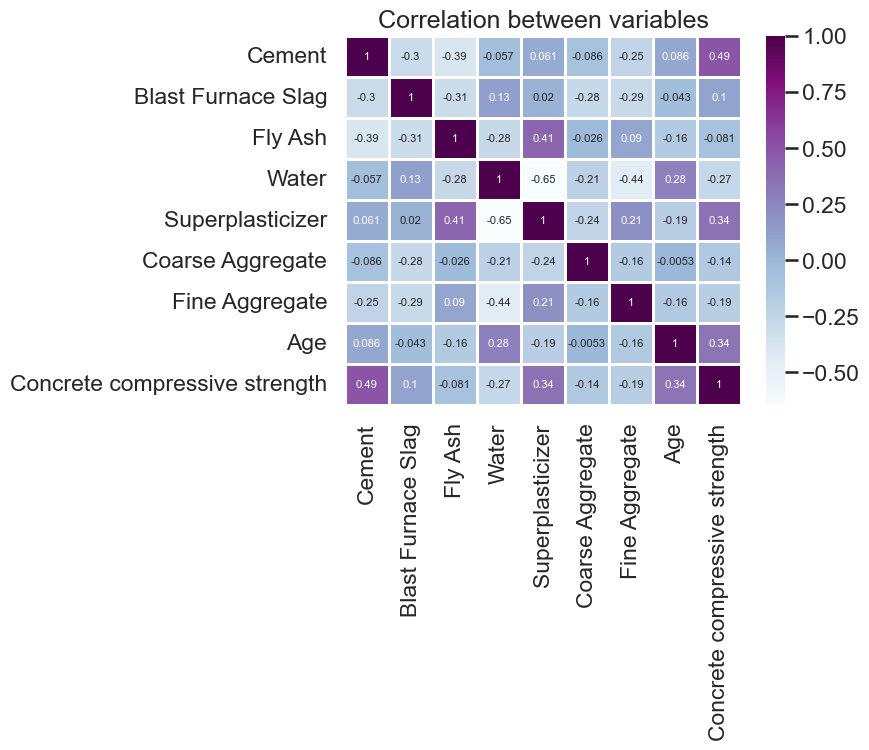

In [14]:

sns.heatmap(dataframe.corr(), annot=True, linewidth=2, cmap="BuPu", annot_kws={"size": 8})
plt.title("Correlation between variables")
plt.show()


C:\Users\rdas6\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


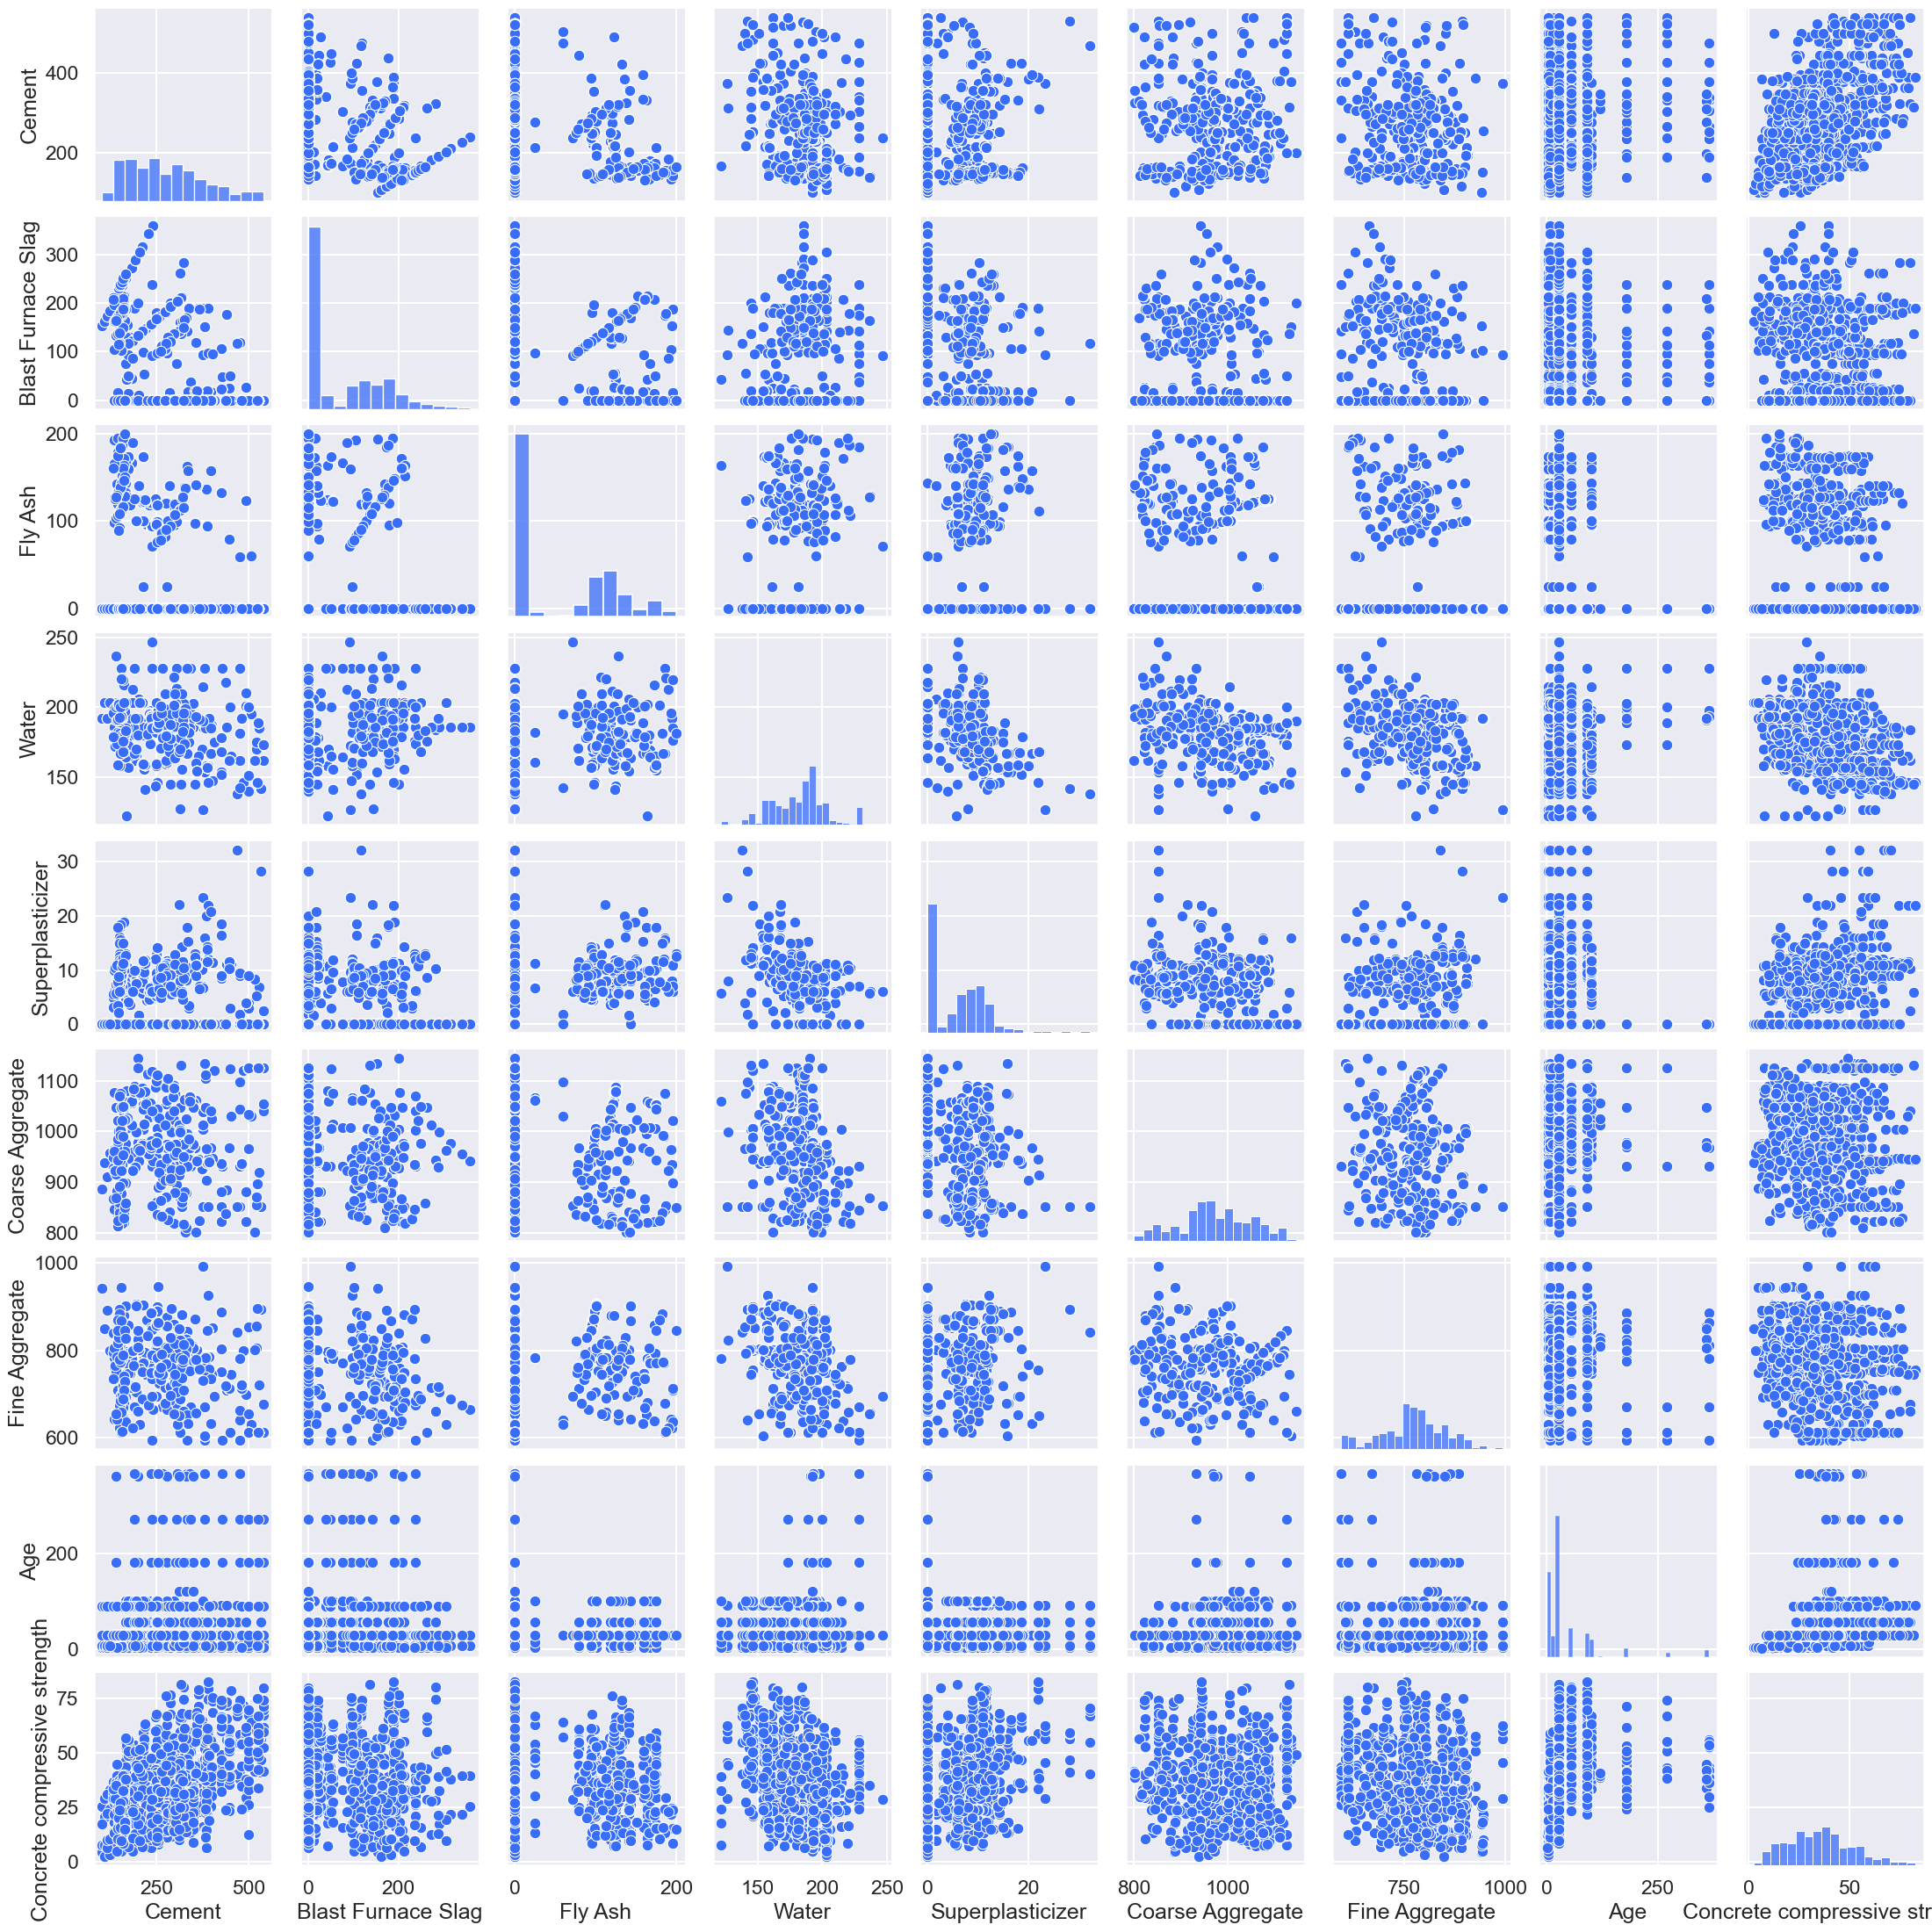

In [26]:
sns.pairplot(dataframe)

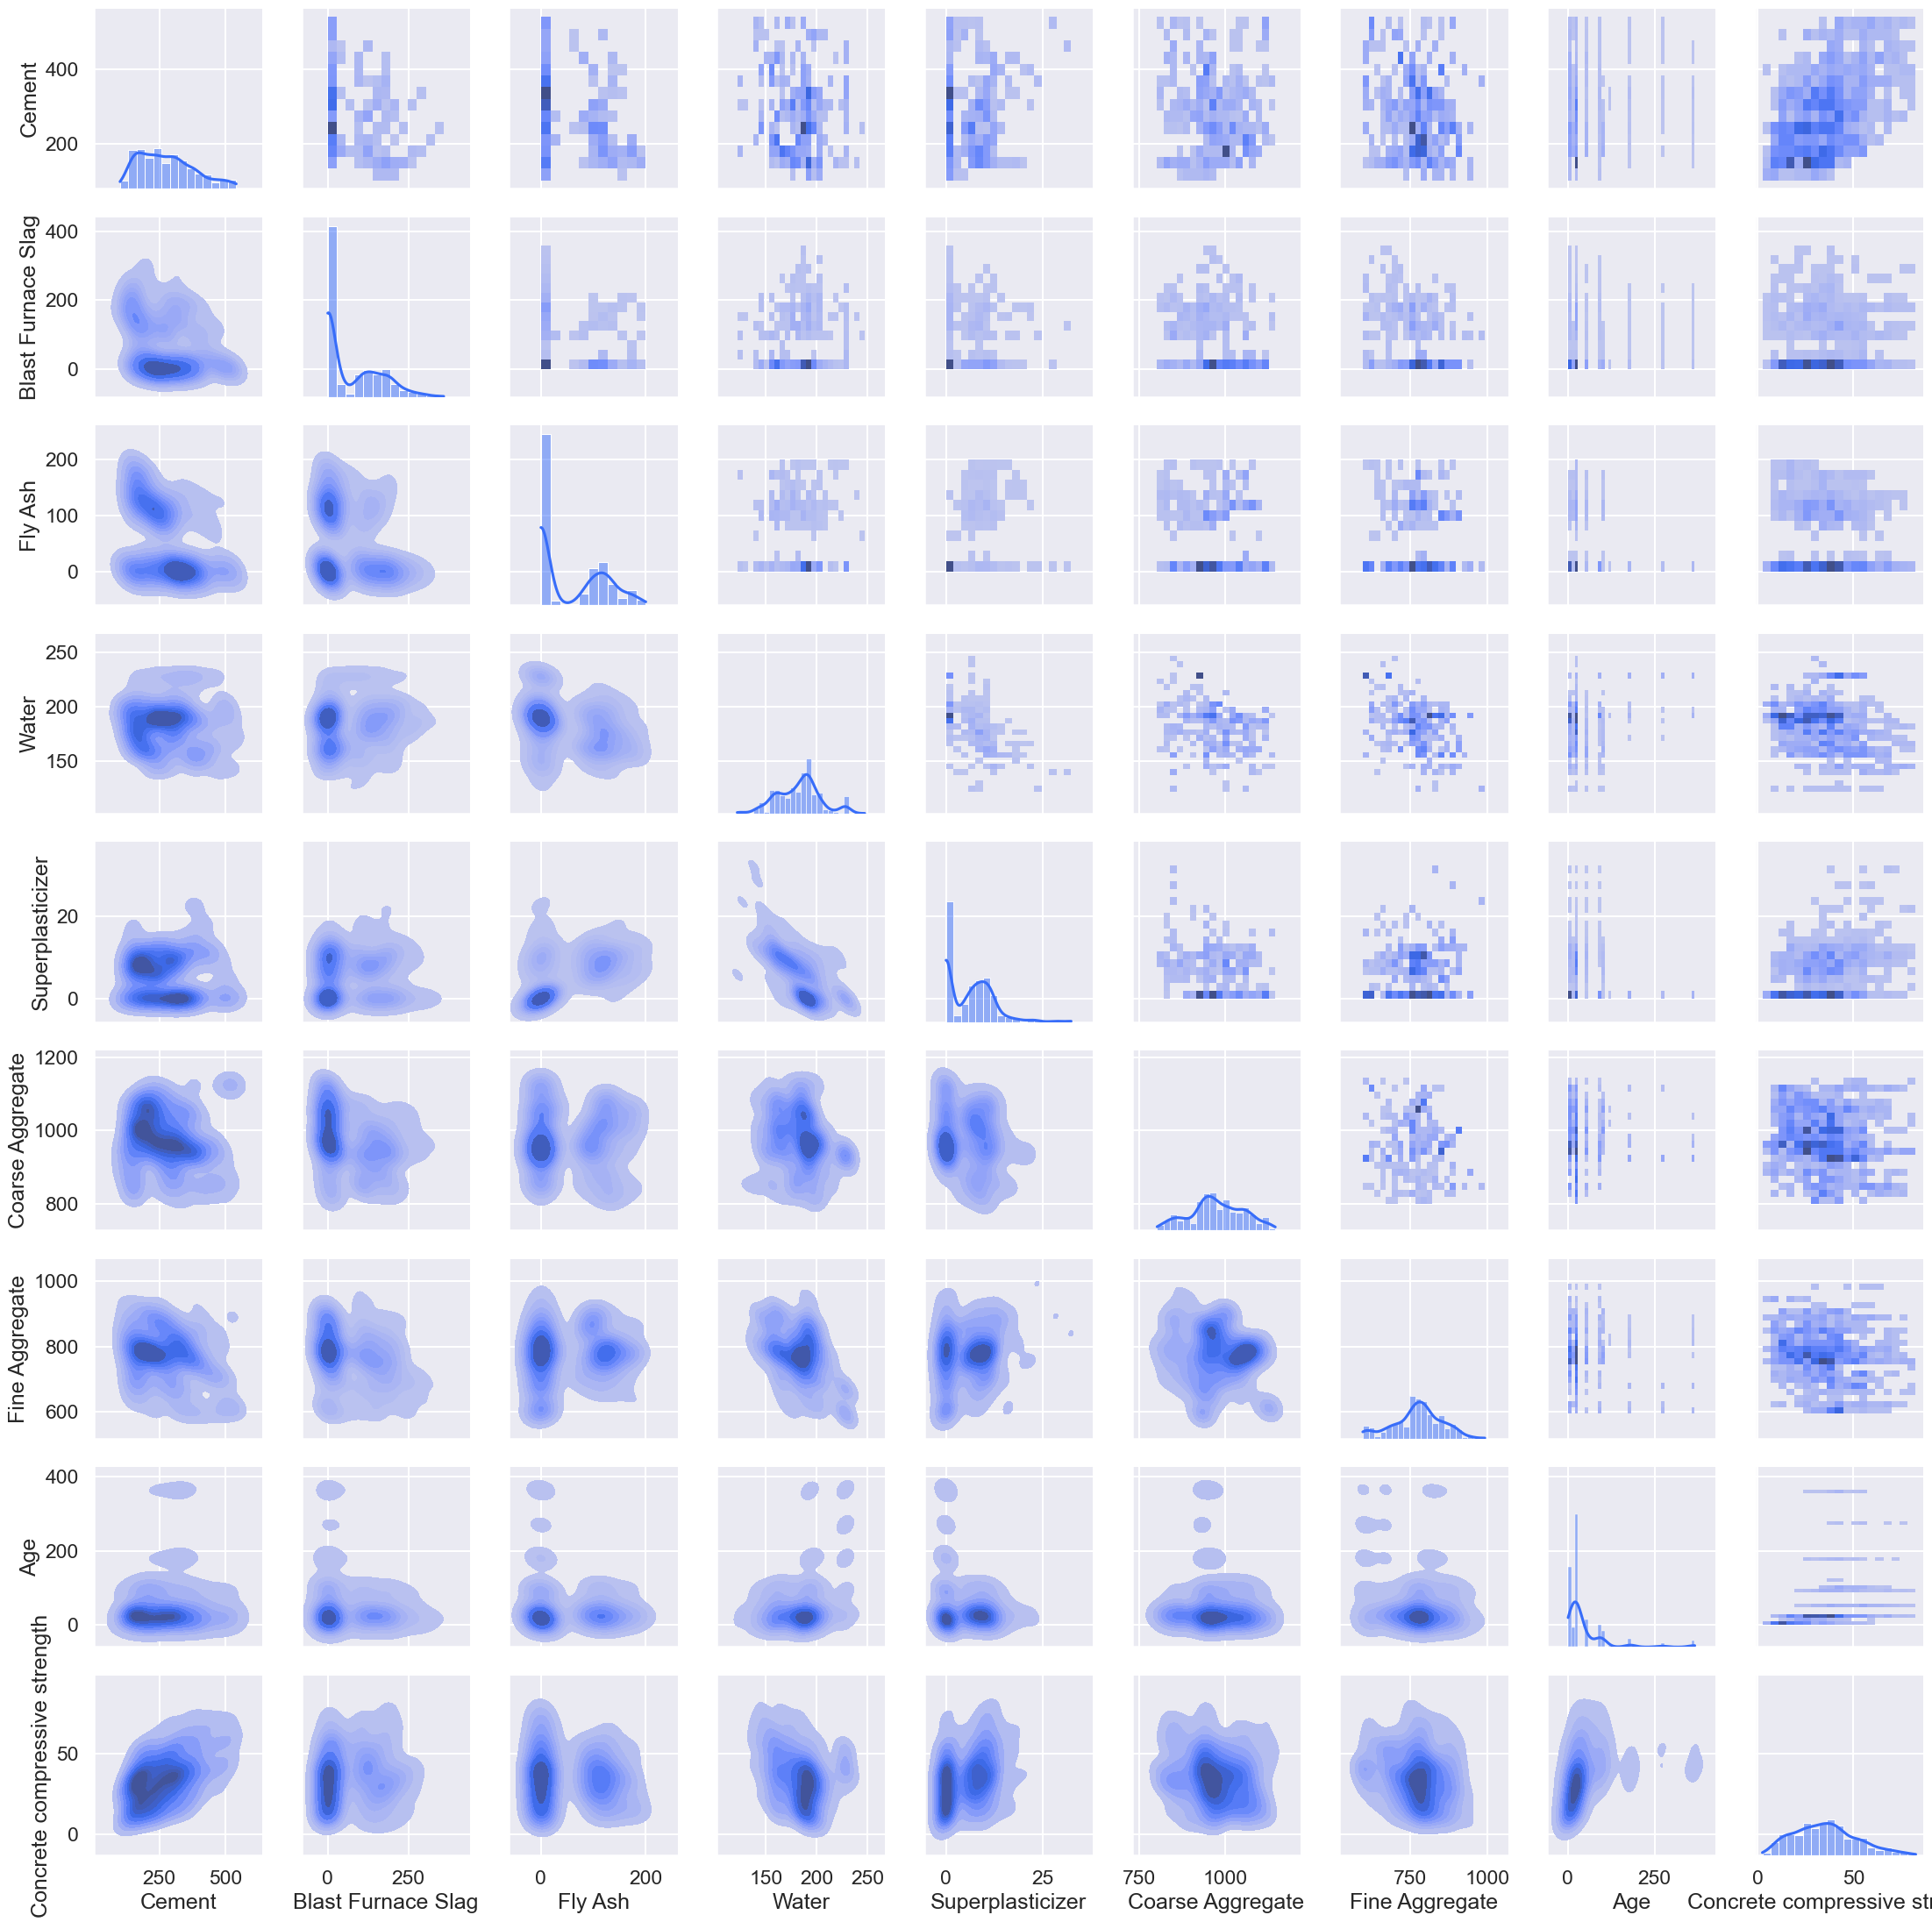

In [27]:
g = sns.PairGrid(dataframe)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)